In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
Case = pd.read_csv('Case.csv')
# 지역, 도시, 단체 감염 여부, 감염 케이스(장소), 확인된 누적 수, 위도, 경도
PatientInfo = pd.read_csv('PatientInfo.csv')
#성별, 태어난 년도, 나이(10대, 20대,), 국적, 지역, 질병, 감염 케이스(해외, 환자 접촉 등)
#감염 순서 (누구에 의해 감염되었는가), 접촉자 수, 감염증세 날짜, 확진 날짜, 공개 날짜, 
#사망한 날짜, 격리/석방/사망
Time = pd.read_csv('Time.csv')
# 날짜, 시간(오전, 오후), 검사 수, 음성, 양성 수, 격리해제, 사망자 수
TimeAge = pd.read_csv('TimeAge.csv')
#나이대 별 확진자 수와 사망자 수를 날짜에 따라 정리
TimeProvince = pd.read_csv('TimeProvince.csv')
#지역별 확진자 사망자 격리해제 수 날짜, 시간별로 정리
Policy = pd.read_csv('Policy.csv')

Time_recent = pd.read_csv('Time_recent.csv')
TimeAge_recent = pd.read_csv('TimeAge_recent.csv')
total_confirmed = pd.read_csv('total_confirmed.csv')
total_confirmed.tail()

,Unnamed: 0,date,accumulate,daily,death,released
211,211,08/30,19699,299,323,14903
212,212,08/31,19947,248,324,14973
213,213,09/01,20182,235,324,15198
214,214,09/02,20449,267,326,15356
215,215,09/03,20644,195,329,15529


In [4]:
Policy

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
5,6,Korea,Immigration,Special Immigration Procedure,from Hong Kong,2020-02-12,NaN
6,7,Korea,Immigration,Special Immigration Procedure,from Macau,2020-02-12,NaN
7,8,Korea,Immigration,Special Immigration Procedure,from Japan,2020-03-09,NaN
8,9,Korea,Immigration,Special Immigration Procedure,from Italy,2020-03-12,NaN
9,10,Korea,Immigration,Special Immigration Procedure,from Iran,2020-03-12,NaN


In [5]:
Time_recent_date = Time_recent['date']
Time_recent_test = Time_recent['test']
Time_recent_confirmed = Time_recent['confirmed']
Time_recent_deceased = Time_recent['deceased']

In [6]:
TimeAge_0s = TimeAge_recent.loc[TimeAge_recent['age'] == '0s']
TimeAge_10s = TimeAge_recent.loc[TimeAge_recent['age'] == '10s']
TimeAge_20s = TimeAge_recent.loc[TimeAge_recent['age'] == '20s']
TimeAge_30s = TimeAge_recent.loc[TimeAge_recent['age'] == '30s']
TimeAge_40s = TimeAge_recent.loc[TimeAge_recent['age'] == '40s']
TimeAge_50s = TimeAge_recent.loc[TimeAge_recent['age'] == '50s']
TimeAge_60s = TimeAge_recent.loc[TimeAge_recent['age'] == '60s']
TimeAge_70s = TimeAge_recent.loc[TimeAge_recent['age'] == '70s']
TimeAge_80s = TimeAge_recent.loc[TimeAge_recent['age'] == '80s']

In [7]:
TimeAge_date = TimeAge_recent['date']
TimeAge_0s = TimeAge_0s.drop("date", axis=1)
TimeAge_0s = TimeAge_0s.drop("age", axis=1)
TimeAge_10s = TimeAge_10s.drop("date", axis=1)
TimeAge_10s = TimeAge_10s.drop("age", axis=1)
TimeAge_20s = TimeAge_20s.drop("date", axis=1)
TimeAge_20s = TimeAge_20s.drop("age", axis=1)
TimeAge_30s = TimeAge_30s.drop("date", axis=1)
TimeAge_30s = TimeAge_30s.drop("age", axis=1)
TimeAge_40s = TimeAge_40s.drop("date", axis=1)
TimeAge_40s = TimeAge_40s.drop("age", axis=1)
TimeAge_50s = TimeAge_50s.drop("date", axis=1)
TimeAge_50s = TimeAge_50s.drop("age", axis=1)
TimeAge_60s = TimeAge_60s.drop("date", axis=1)
TimeAge_60s = TimeAge_60s.drop("age", axis=1)
TimeAge_70s = TimeAge_70s.drop("date", axis=1)
TimeAge_70s = TimeAge_70s.drop("age", axis=1)
TimeAge_80s = TimeAge_80s.drop("date", axis=1)
TimeAge_80s = TimeAge_80s.drop("age", axis=1)

In [8]:
TimeAge_0s = TimeAge_0s.diff(1, axis=0)
TimeAge_10s = TimeAge_10s.diff(1, axis=0)
TimeAge_20s = TimeAge_20s.diff(1, axis=0)
TimeAge_30s = TimeAge_30s.diff(1, axis=0)
TimeAge_40s = TimeAge_40s.diff(1, axis=0)
TimeAge_50s = TimeAge_50s.diff(1, axis=0)
TimeAge_60s = TimeAge_60s.diff(1, axis=0)
TimeAge_70s = TimeAge_70s.diff(1, axis=0)
TimeAge_80s = TimeAge_80s.diff(1, axis=0)

In [9]:
TimeAge_0s['date'] = TimeAge_date
TimeAge_10s['date'] = TimeAge_date
TimeAge_20s['date'] = TimeAge_date
TimeAge_30s['date'] = TimeAge_date
TimeAge_40s['date'] = TimeAge_date
TimeAge_50s['date'] = TimeAge_date
TimeAge_60s['date'] = TimeAge_date
TimeAge_70s['date'] = TimeAge_date
TimeAge_80s['date'] = TimeAge_date

In [10]:
TimeAge_0s.iloc[0, 1:3] = 0
TimeAge_10s.iloc[0, 1:3] = 0
TimeAge_20s.iloc[0, 1:3] = 0
TimeAge_30s.iloc[0, 1:3] = 0
TimeAge_40s.iloc[0, 1:3] = 0
TimeAge_50s.iloc[0, 1:3] = 0
TimeAge_60s.iloc[0, 1:3] = 0
TimeAge_70s.iloc[0, 1:3] = 0
TimeAge_80s.iloc[0, 1:3] = 0

In [11]:
TimeAge_0s = TimeAge_0s.reset_index(drop=True)
TimeAge_10s = TimeAge_10s.reset_index(drop=True)
TimeAge_20s = TimeAge_20s.reset_index(drop=True)
TimeAge_30s = TimeAge_30s.reset_index(drop=True)
TimeAge_40s = TimeAge_40s.reset_index(drop=True)
TimeAge_50s = TimeAge_50s.reset_index(drop=True)
TimeAge_60s = TimeAge_60s.reset_index(drop=True)
TimeAge_70s = TimeAge_70s.reset_index(drop=True)
TimeAge_80s = TimeAge_80s.reset_index(drop=True)

# 전염병 경보 발령 이후의 확진자 추이

1. __전염병 경보 2단계 발령 후__ 
 - (2020년 1월 20일 ~ 27일)

In [12]:
Time_date = Time['date']
Time_test = Time['test']
Time_confirmed = Time['confirmed']
Time_deceased = Time['deceased']

In [13]:
confirm_df = pd.DataFrame({'코로나 검사': Time_test, '확진자 수': Time_confirmed, '사망자 수': Time_deceased})
confirm_df = confirm_df.diff(1, axis=0)
confirm_df['날짜'] = Time_date
confirm_df.iloc[0, :2] = 1
level2_df = confirm_df.iloc[:8, :]

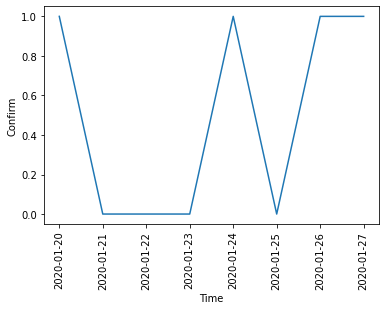

In [14]:
#날짜별 코로나 확진자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(level2_df['날짜'], level2_df['확진자 수'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

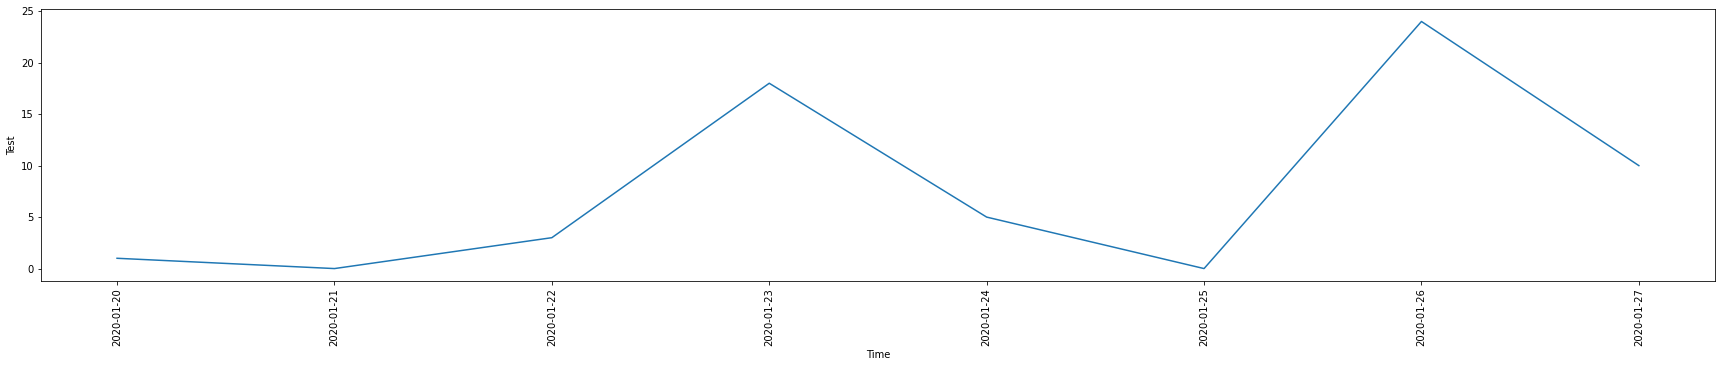

In [15]:
#날짜별 코로나 검사 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(level2_df['날짜'], level2_df['코로나 검사'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Test')
plt.show()

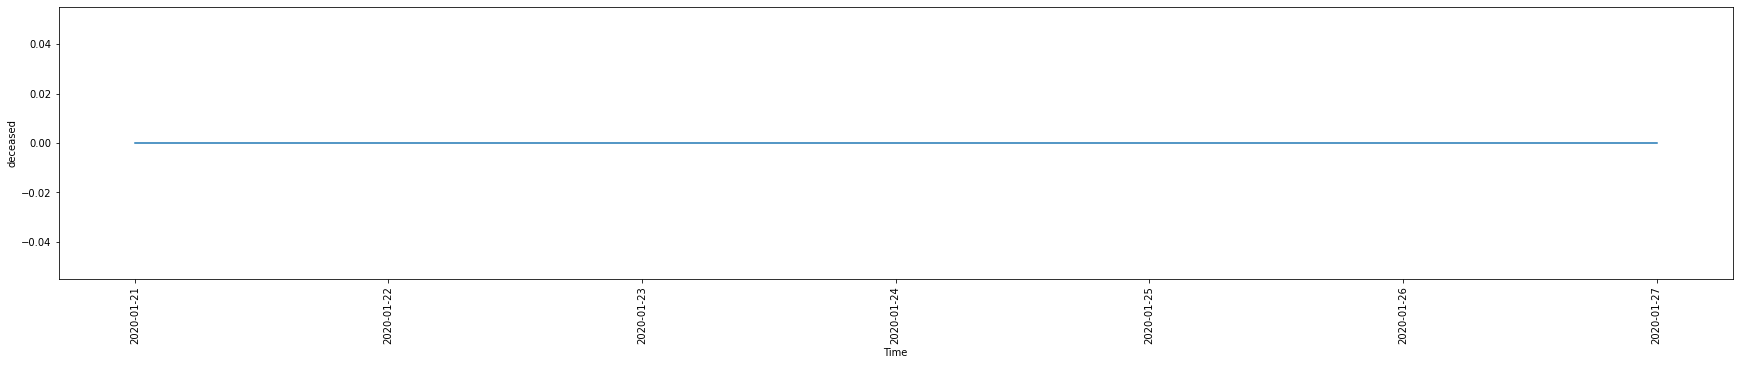

In [16]:
#날짜별 코로나 사망자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(level2_df['날짜'], level2_df['사망자 수'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('deceased')
plt.show()

2. __전염병 경보 3단계 발령 후__ 
 - (2020년 1월 2일 ~ 2월 22일)

In [17]:
level3_df = confirm_df.iloc[8: 34]

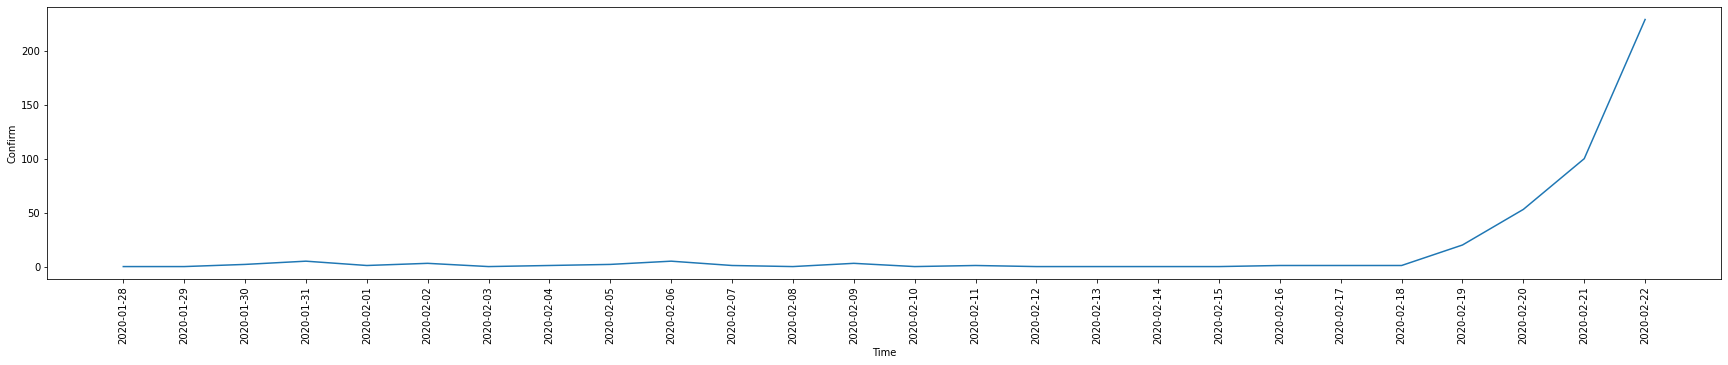

In [18]:
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(level3_df['날짜'], level3_df['확진자 수'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

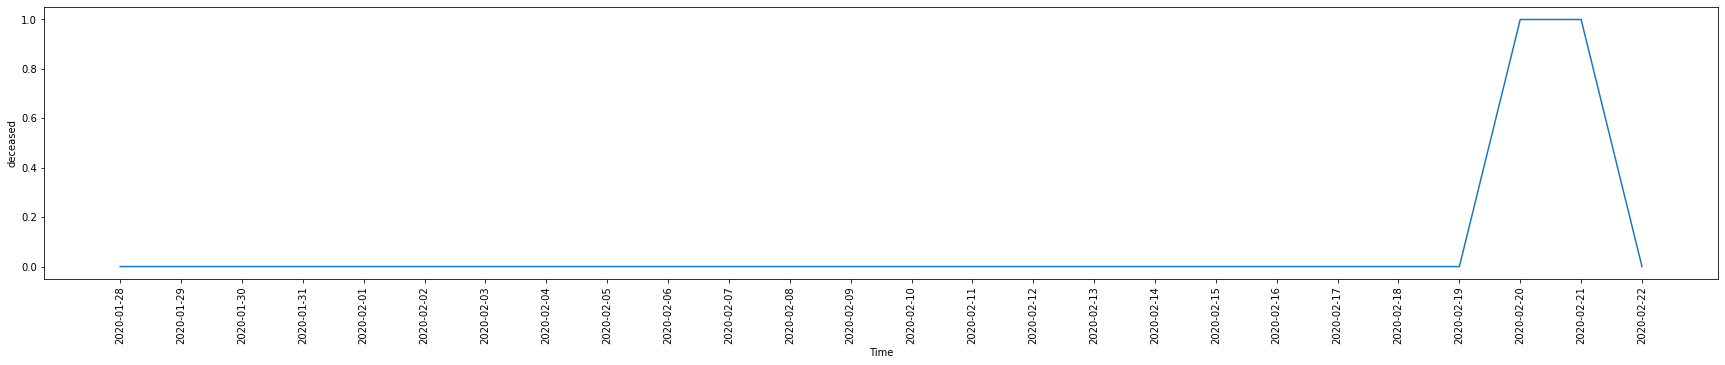

In [19]:
#날짜별 코로나 사망자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(level3_df['날짜'], level3_df['사망자 수'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('deceased')
plt.show()

3. __전염병 경보 4단계 발령 후__ 
 - (2020년 2월 23일 ~)

In [20]:
level4_df = confirm_df.iloc[34:]

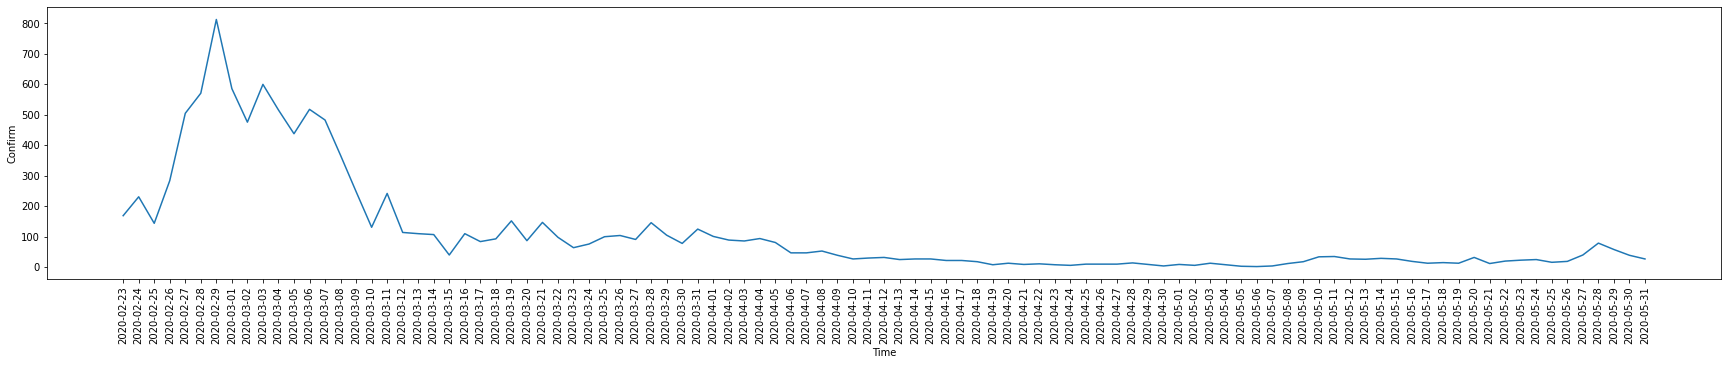

In [21]:
#날짜별 코로나 확진자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(level4_df['날짜'], level4_df['확진자 수'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

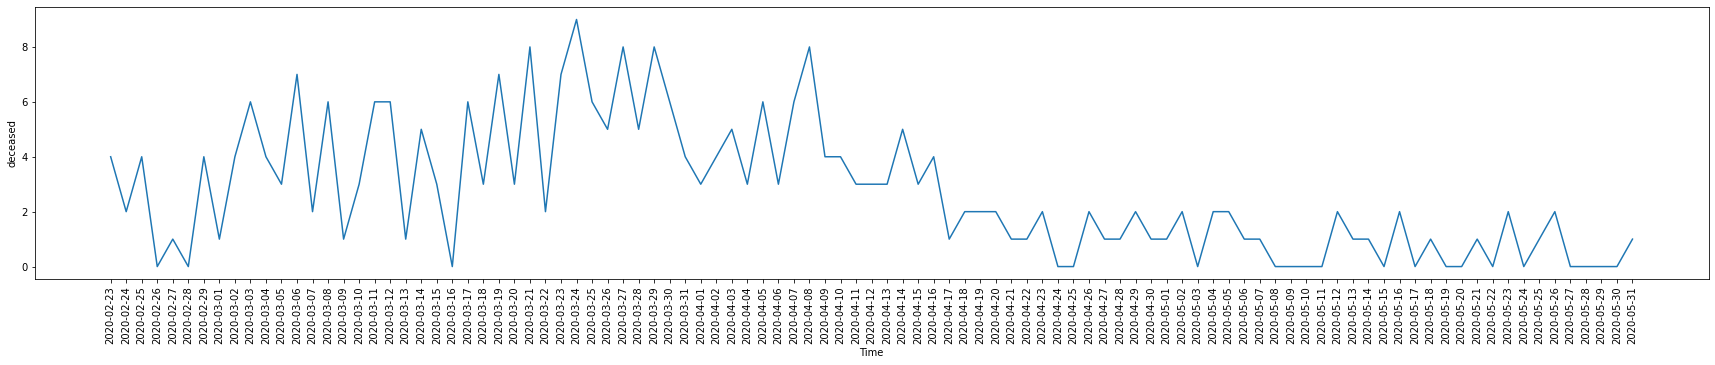

In [22]:
#날짜별 코로나 사망자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(level4_df['날짜'], level4_df['사망자 수'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('deceased')
plt.show()

코로나 검사를 받는 사람들이 늘어날 가능성이 보이자 3단계 전환, 대폭 늘어날 가능성이 보일 때, 사망자가 처음으로 나왔을 때 4단계로 전환하였음을 알 수 있었다.

# 사회적 거리두기에 따른 코로나 확진자 변화 양상

1. 사회적 거리두기를 실시하기 전

In [23]:
before_distance_df = confirm_df.iloc[:63]

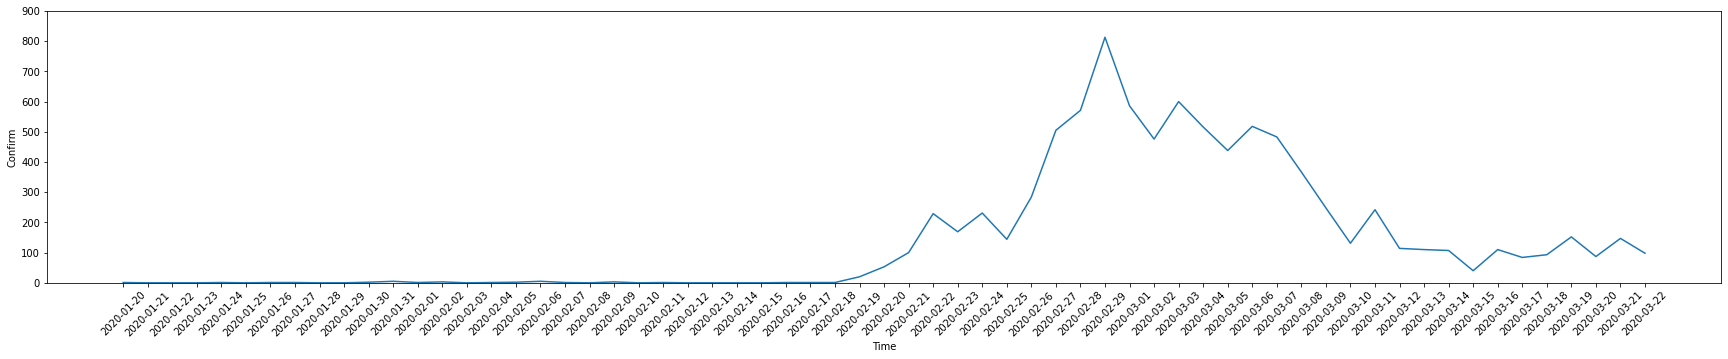

In [24]:
#날짜별 코로나 확진자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_distance_df['날짜'], before_distance_df['확진자 수'])
plt.xticks(rotation=45)
plt.ylim(0, 900)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

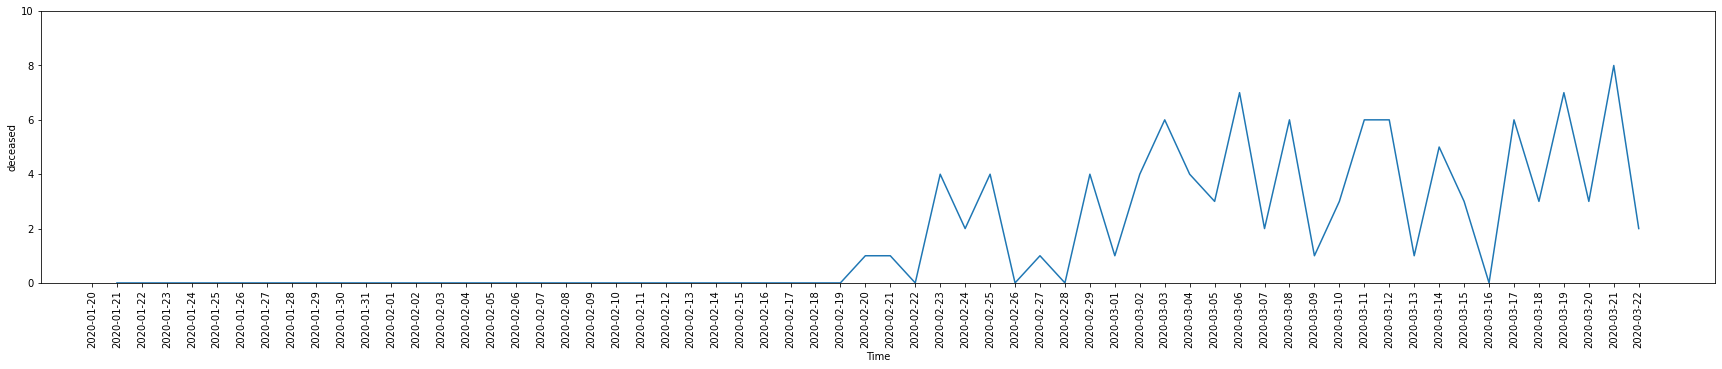

In [25]:
#날짜별 코로나 사망자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_distance_df['날짜'], before_distance_df['사망자 수'])
plt.xticks(rotation=90)
plt.ylim(0, 10)
plt.xlabel('Time')
plt.ylabel('deceased')
plt.show()

2. 강력한 사회적 거리두기 기간

In [26]:
strong_distance_df = confirm_df.iloc[62:91]

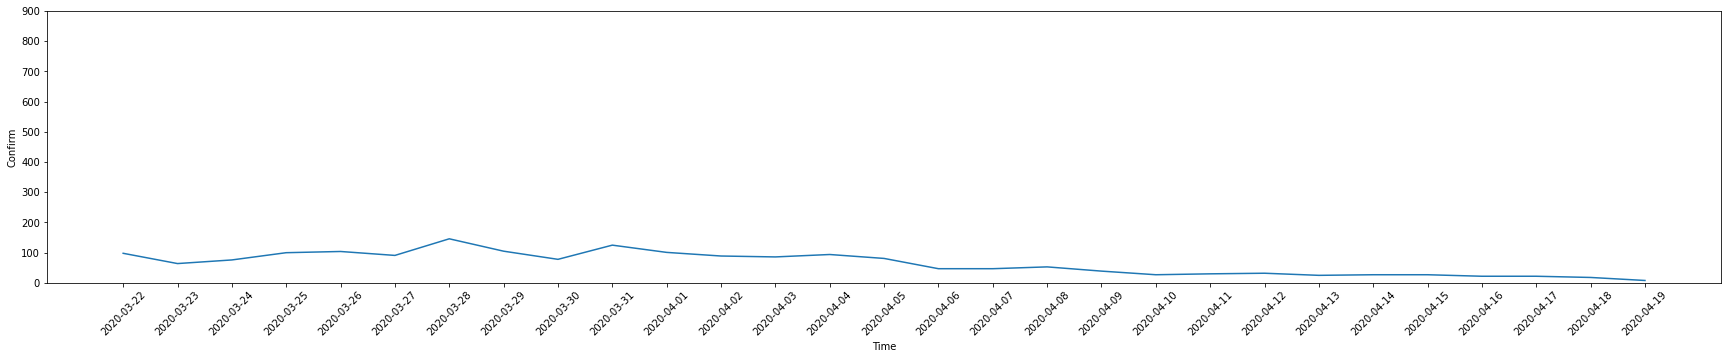

In [27]:
#날짜별 코로나 확진자 수 (위 그래프와 비교 위해 y축의 범위를 같게 조정)
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(strong_distance_df['날짜'], strong_distance_df['확진자 수'])
plt.xticks(rotation=45)
plt.ylim(0, 900)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

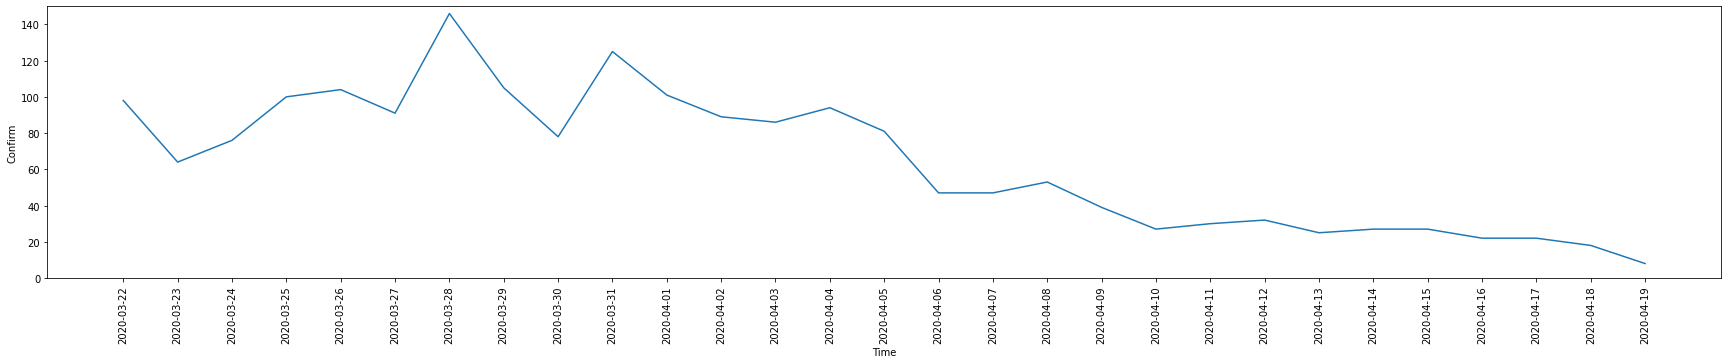

In [28]:
#날짜별 코로나 확진자 수 (그래프를 자세히 볼 수 있게 y축의 범위를 다르게 조정)
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(strong_distance_df['날짜'], strong_distance_df['확진자 수'])
plt.xticks(rotation=90)
plt.ylim(0, 150)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

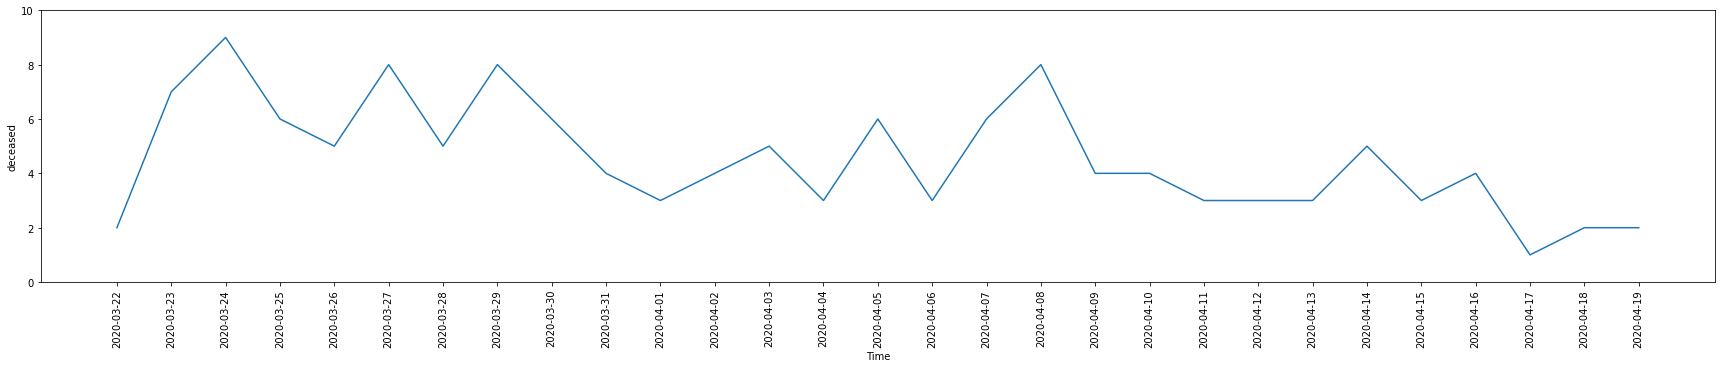

In [29]:
#날짜별 코로나 사망자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(strong_distance_df['날짜'], strong_distance_df['사망자 수'])
plt.xticks(rotation=90)
plt.ylim(0, 10)
plt.xlabel('Time')
plt.ylabel('deceased')
plt.show()

2-1 사회적 거리두기 직전의 확진자 수와 직후의 확진자 수가 비슷해 사회적 거리두기를 실시하기 전 10일, 후 10일의 데이터를 시각화해보았다.

In [30]:
between_distance_df = confirm_df.iloc[54:74]

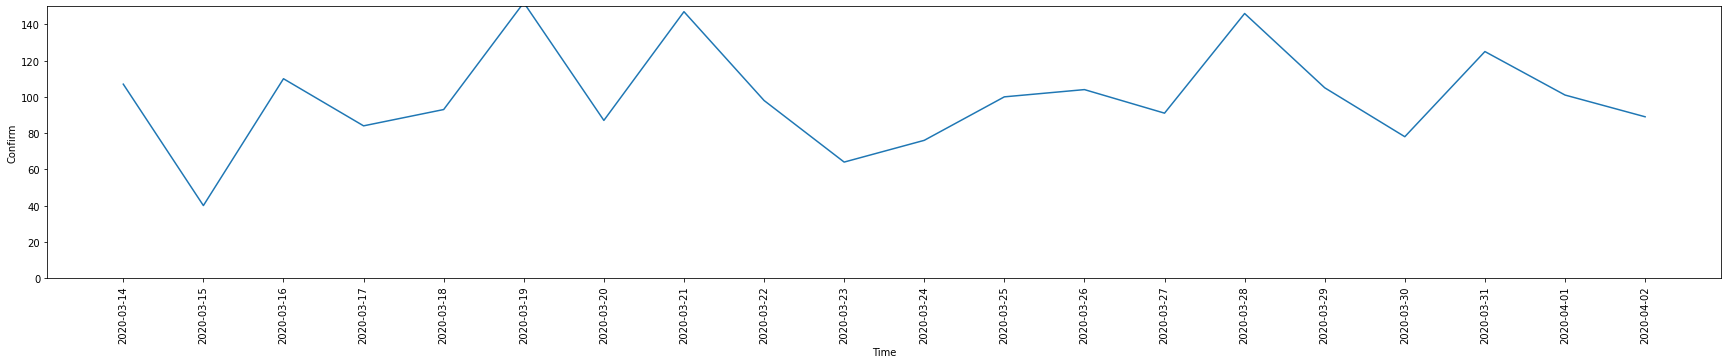

In [31]:
#날짜별 코로나 확진자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(between_distance_df['날짜'], between_distance_df['확진자 수'])
plt.xticks(rotation=90)
plt.ylim(0, 150)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

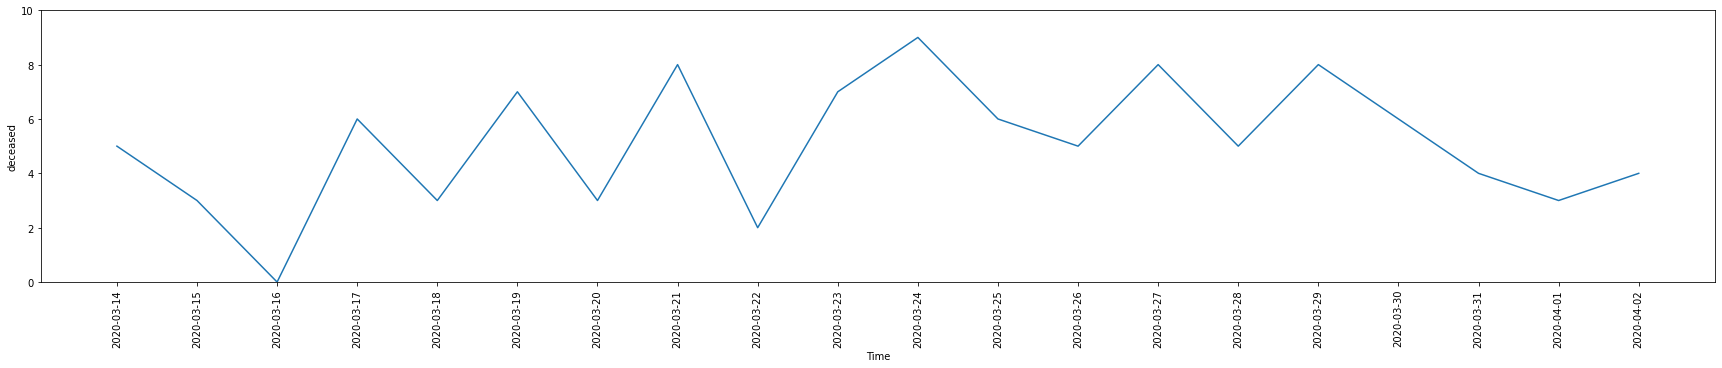

In [32]:
#날짜별 코로나 사망자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(between_distance_df['날짜'], between_distance_df['사망자 수'])
plt.xticks(rotation=90)
plt.ylim(0, 10)
plt.xlabel('Time')
plt.ylabel('deceased')
plt.show()

3. 약한 사회적 거리두기 기간

In [33]:
weak_distance_df = confirm_df.iloc[90:107]

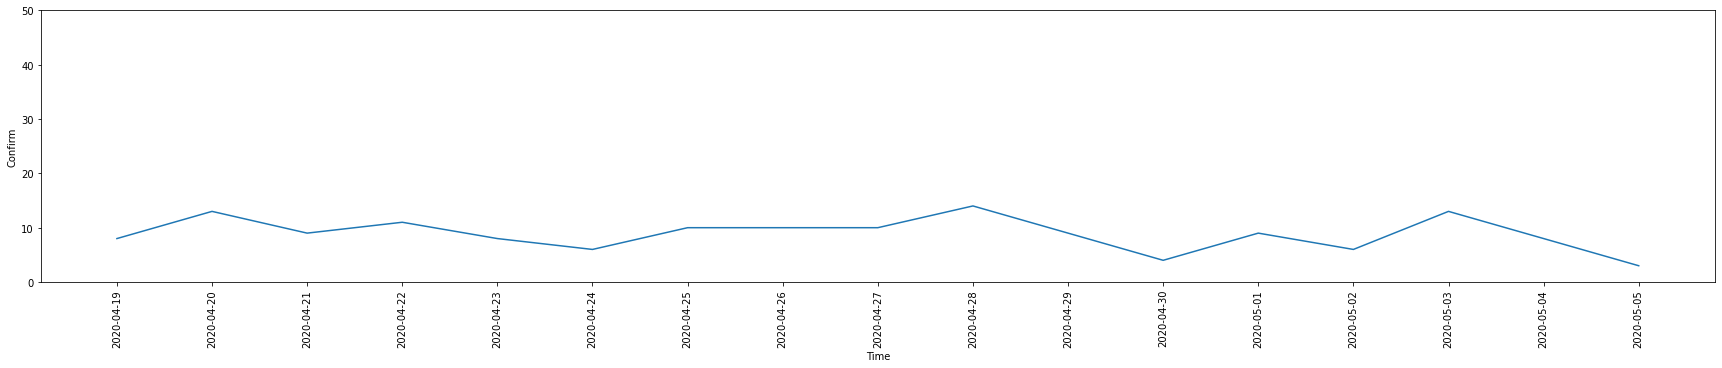

In [34]:
#날짜별 코로나 확진자 수(y축 범위 0-50)
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(weak_distance_df['날짜'], weak_distance_df['확진자 수'])
plt.xticks(rotation=90)
plt.ylim(0, 50)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

4. 거리두기가 끝난 후

In [125]:
after_distance_df = total_confirmed.iloc[93:205]

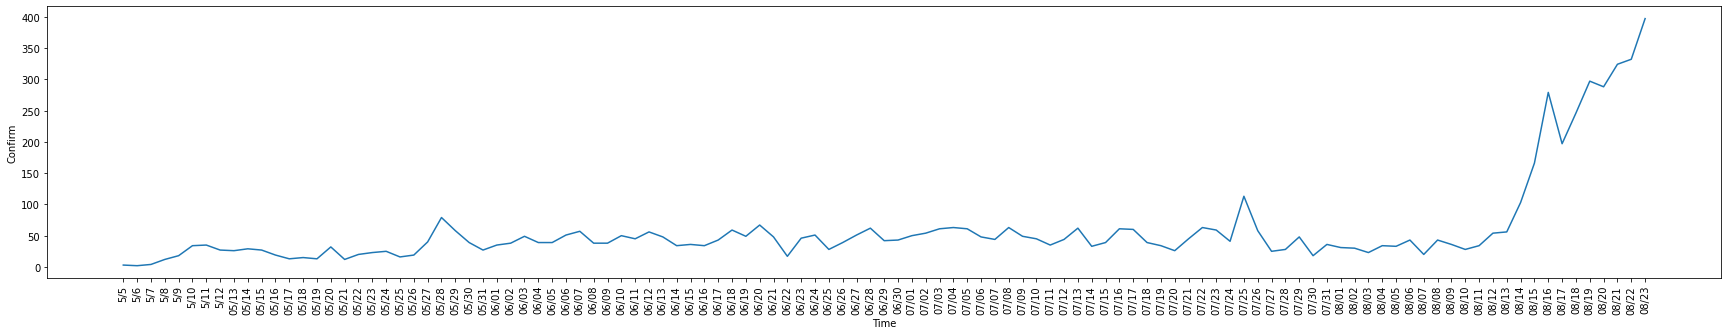

In [115]:
#날짜별 코로나 확진자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(after_distance_df['date'], after_distance_df['daily'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

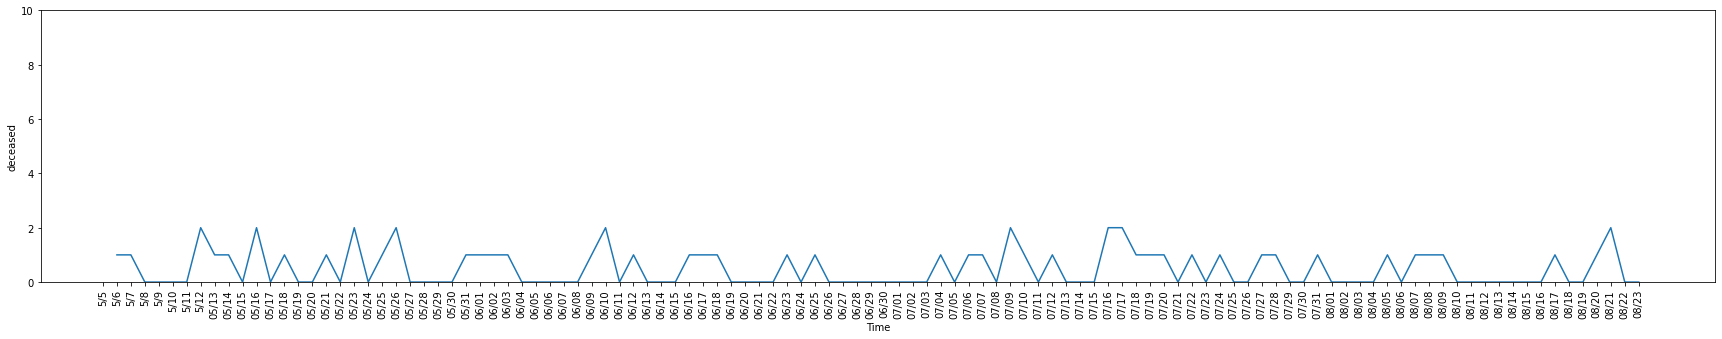

In [116]:
#날짜별 코로나 사망자 수

plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(after_distance_df['date'], after_distance_df['death'].diff())
plt.xticks(rotation=90)
plt.ylim(0, 10)
plt.xlabel('Time')
plt.ylabel('deceased')
plt.show()

5.사회적 거리두기 2.5단계 실시 이후

In [117]:
level2half_distance_df = total_confirmed.iloc[204:]

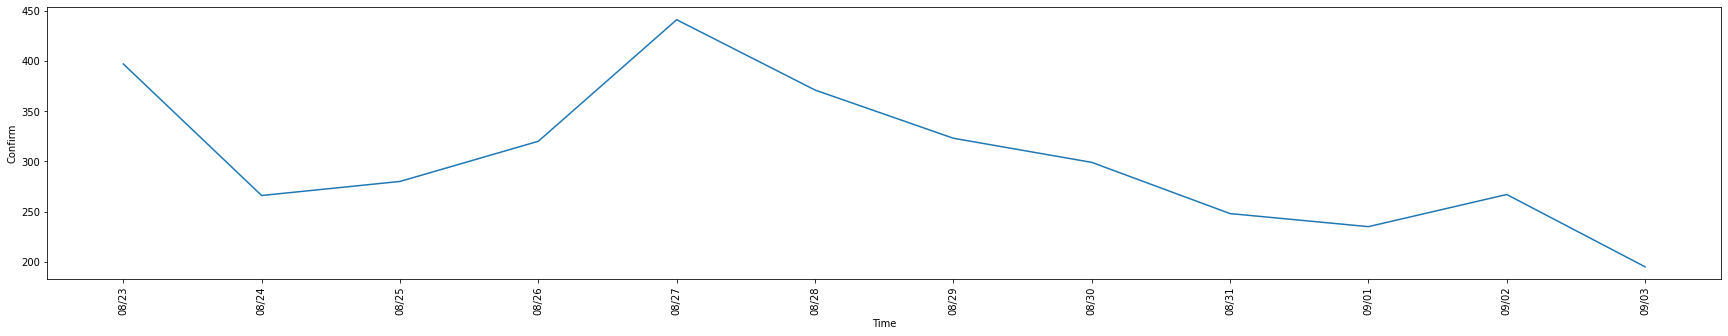

In [118]:
#날짜별 코로나 확진자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(level2half_distance_df['date'], level2half_distance_df['daily'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

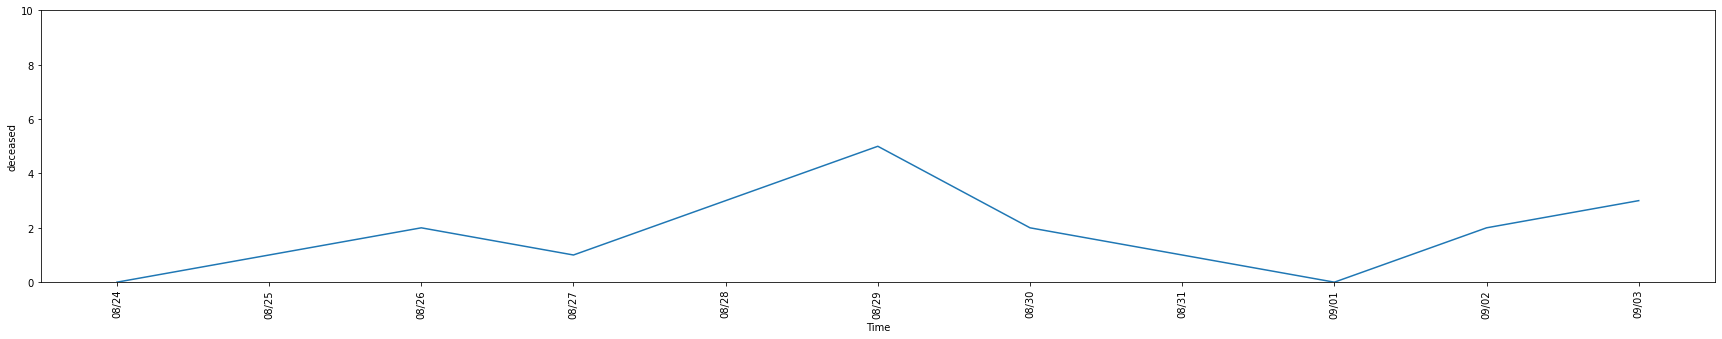

In [119]:
#날짜별 코로나 사망자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(level2half_distance_df['date'], level2half_distance_df['death'].diff())
plt.xticks(rotation=90)
plt.ylim(0, 10)
plt.xlabel('Time')
plt.ylabel('deceased')
plt.show()

### 전체적인 그래프 양상

1. 확진자 수

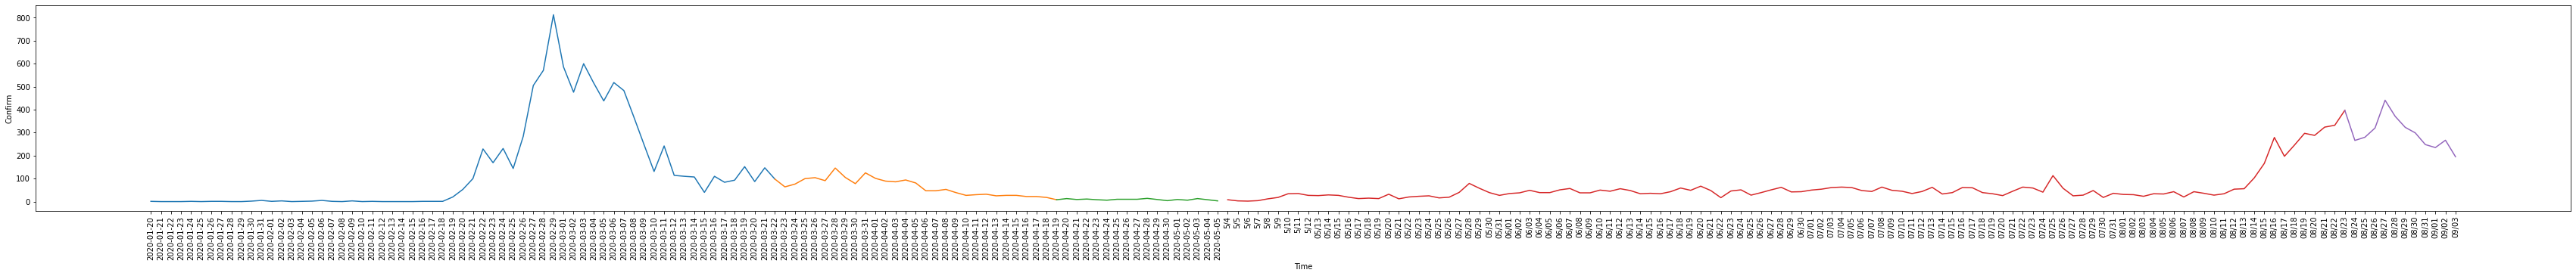

In [127]:
plt.figure()
plt.rcParams['figure.figsize'] = [60, 5]
plt.plot(before_distance_df['날짜'], before_distance_df['확진자 수'])
plt.plot(strong_distance_df['날짜'], strong_distance_df['확진자 수'])
plt.plot(weak_distance_df['날짜'], weak_distance_df['확진자 수'])
plt.plot(after_distance_df['date'], after_distance_df['daily'])
plt.plot(level2half_distance_df['date'], level2half_distance_df['daily'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

2. 사망자 수

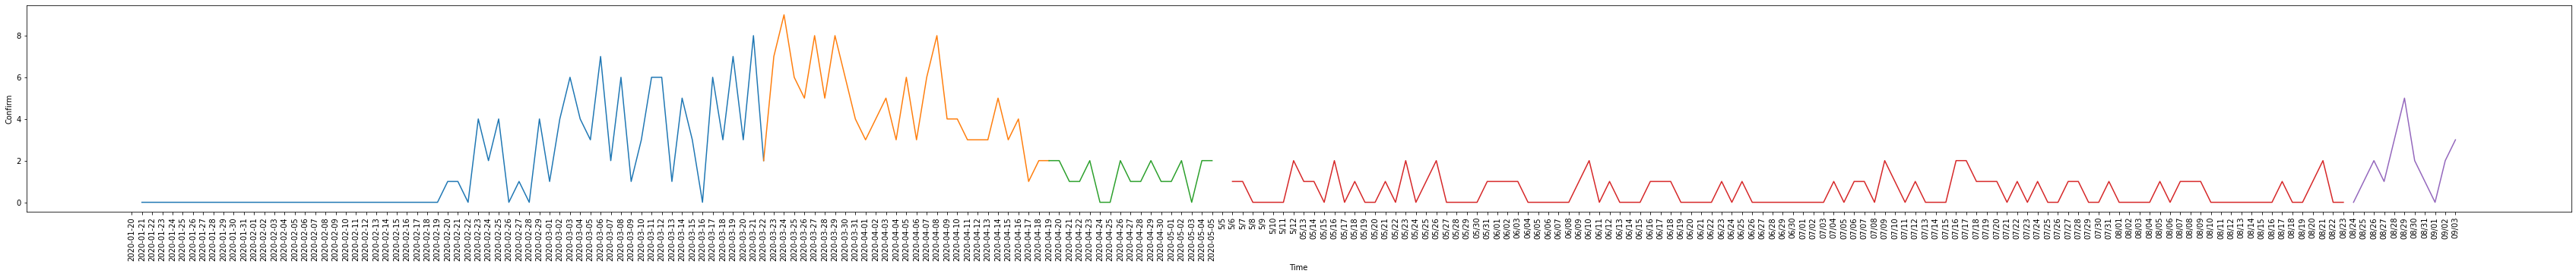

In [124]:
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_distance_df['날짜'], before_distance_df['사망자 수'])
plt.plot(strong_distance_df['날짜'], strong_distance_df['사망자 수'])
plt.plot(weak_distance_df['날짜'], weak_distance_df['사망자 수'])
plt.plot(after_distance_df['date'], after_distance_df['death'].diff())
plt.plot(level2half_distance_df['date'], level2half_distance_df['death'].diff())
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

3. 사회적 거리두기가 각 나이대에 미친 영향

In [40]:
before_distance_0 = TimeAge_0s.iloc[:21]
before_distance_10 = TimeAge_10s.iloc[:21]
before_distance_20 = TimeAge_20s.iloc[:21]
before_distance_30 = TimeAge_30s.iloc[:21]
before_distance_40 = TimeAge_40s.iloc[:21]
before_distance_50 = TimeAge_50s.iloc[:21]
before_distance_60 = TimeAge_60s.iloc[:21]
before_distance_70 = TimeAge_70s.iloc[:21]
before_distance_80 = TimeAge_80s.iloc[:21]
strong_distance_0 = TimeAge_0s.iloc[20:49]
strong_distance_10 = TimeAge_10s.iloc[20:49]
strong_distance_20 = TimeAge_20s.iloc[20:49]
strong_distance_30 = TimeAge_30s.iloc[20:49]
strong_distance_40 = TimeAge_40s.iloc[20:49]
strong_distance_50 = TimeAge_50s.iloc[20:49]
strong_distance_60 = TimeAge_60s.iloc[20:49]
strong_distance_70 = TimeAge_70s.iloc[20:49]
strong_distance_80 = TimeAge_80s.iloc[20:49]
weak_distance_0 = TimeAge_0s.iloc[48:65]
weak_distance_10 = TimeAge_10s.iloc[48:65]
weak_distance_20 = TimeAge_20s.iloc[48:65]
weak_distance_30 = TimeAge_30s.iloc[48:65]
weak_distance_40 = TimeAge_40s.iloc[48:65]
weak_distance_50 = TimeAge_50s.iloc[48:65]
weak_distance_60 = TimeAge_60s.iloc[48:65]
weak_distance_70 = TimeAge_70s.iloc[48:65]
weak_distance_80 = TimeAge_80s.iloc[48:65]
after_distance_0 = TimeAge_0s.iloc[64:]
after_distance_10 = TimeAge_10s.iloc[64:]
after_distance_20 = TimeAge_20s.iloc[64:]
after_distance_30 = TimeAge_30s.iloc[64:]
after_distance_40 = TimeAge_40s.iloc[64:]
after_distance_50 = TimeAge_50s.iloc[64:]
after_distance_60 = TimeAge_60s.iloc[64:]
after_distance_70 = TimeAge_70s.iloc[64:]
after_distance_80 = TimeAge_80s.iloc[64:]

1) 10대 이하

확진자 수

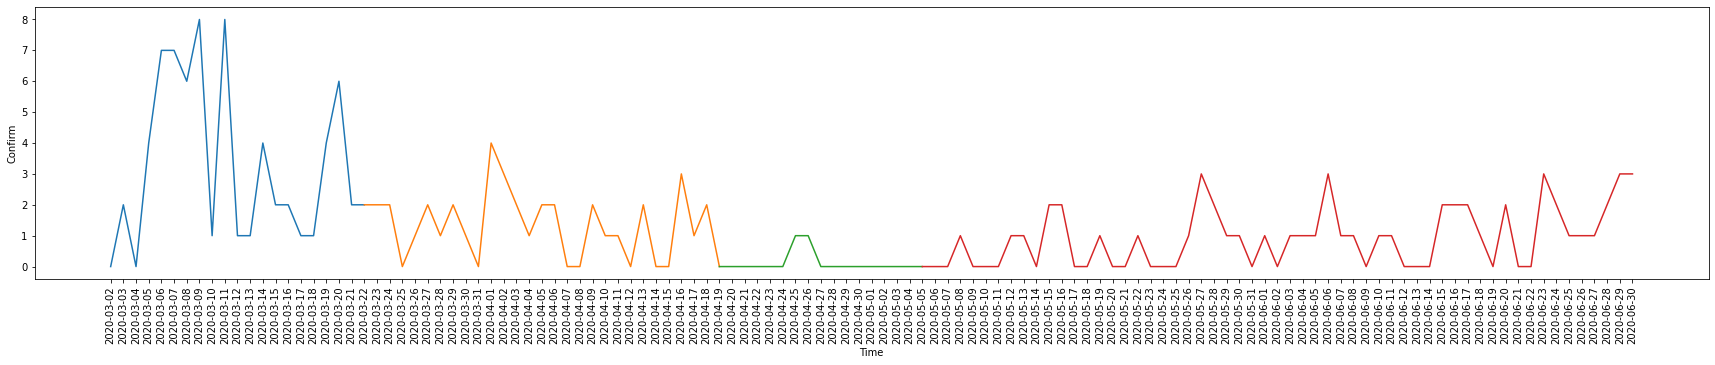

In [41]:
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_distance_0['date'], before_distance_0['confirmed'])
plt.plot(strong_distance_0['date'], strong_distance_0['confirmed'])
plt.plot(weak_distance_0['date'], weak_distance_0['confirmed'])
plt.plot(after_distance_0['date'], after_distance_0['confirmed'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

사망자 수

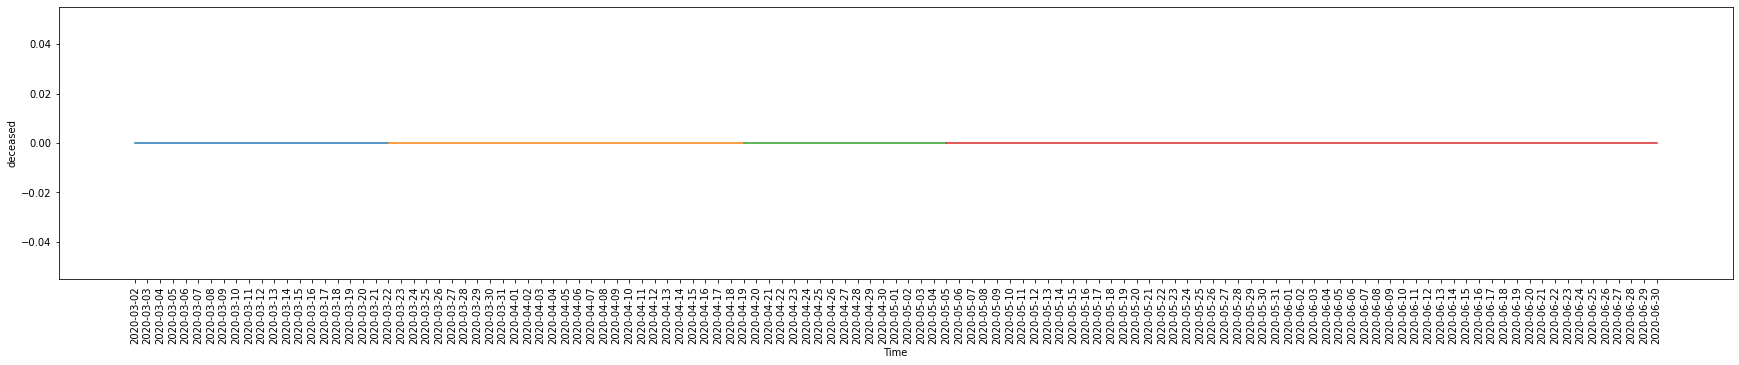

In [42]:
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_distance_0['date'], before_distance_0['deceased'])
plt.plot(strong_distance_0['date'], strong_distance_0['deceased'])
plt.plot(weak_distance_0['date'], weak_distance_0['deceased'])
plt.plot(after_distance_0['date'], after_distance_0['deceased'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('deceased')
plt.show()

2) 10대

확진자 수

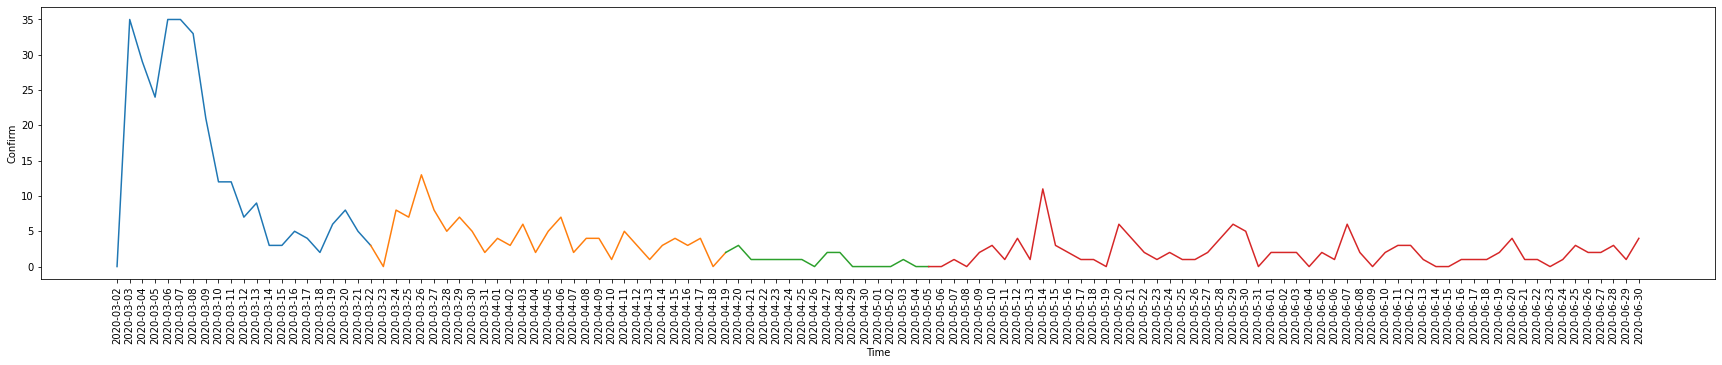

In [43]:
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_distance_10['date'], before_distance_10['confirmed'])
plt.plot(strong_distance_10['date'], strong_distance_10['confirmed'])
plt.plot(weak_distance_10['date'], weak_distance_10['confirmed'])
plt.plot(after_distance_10['date'], after_distance_10['confirmed'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

사망자 수

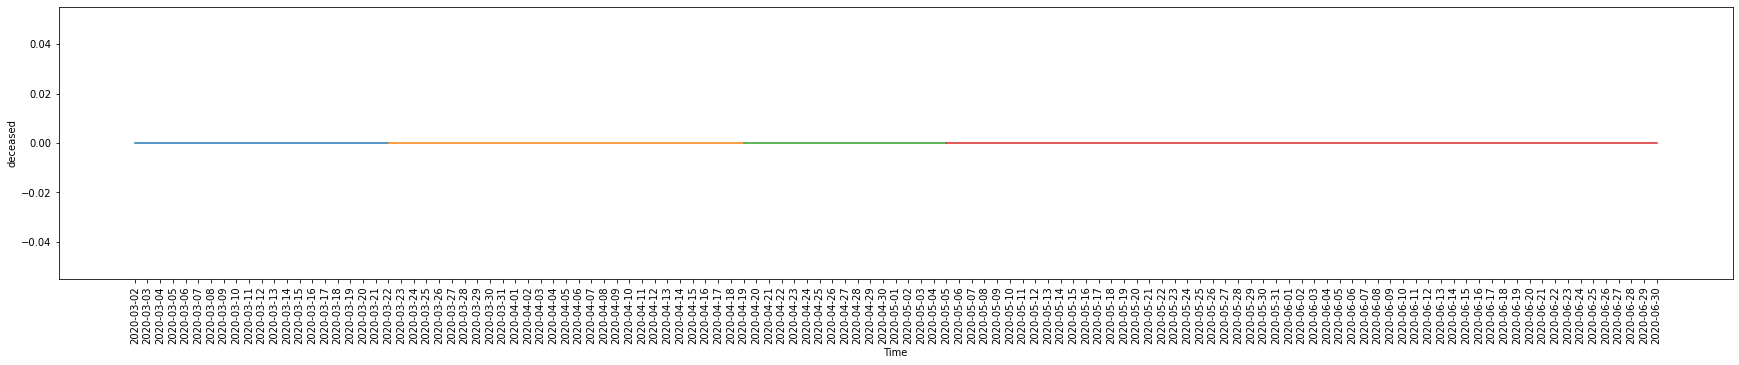

In [44]:
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_distance_10['date'], before_distance_10['deceased'])
plt.plot(strong_distance_10['date'], strong_distance_10['deceased'])
plt.plot(weak_distance_10['date'], weak_distance_10['deceased'])
plt.plot(after_distance_10['date'], after_distance_10['deceased'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('deceased')
plt.show()

3) 20대

확진자 수

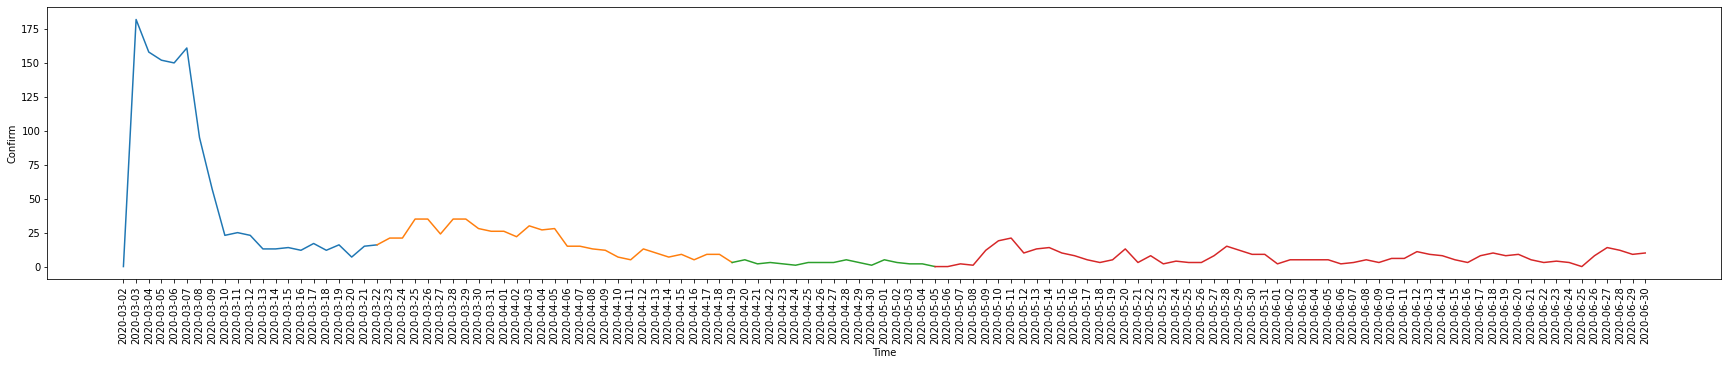

In [45]:
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_distance_20['date'], before_distance_20['confirmed'])
plt.plot(strong_distance_20['date'], strong_distance_20['confirmed'])
plt.plot(weak_distance_20['date'], weak_distance_20['confirmed'])
plt.plot(after_distance_20['date'], after_distance_20['confirmed'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

사망자 수

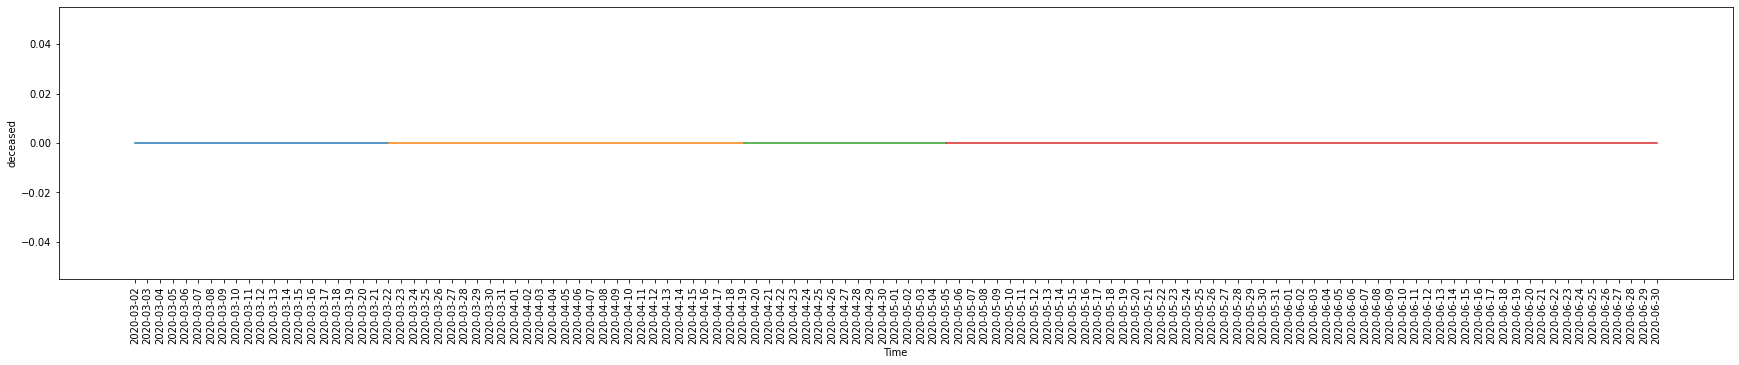

In [46]:
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_distance_20['date'], before_distance_20['deceased'])
plt.plot(strong_distance_20['date'], strong_distance_20['deceased'])
plt.plot(weak_distance_20['date'], weak_distance_20['deceased'])
plt.plot(after_distance_20['date'], after_distance_20['deceased'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('deceased')
plt.show()

4) 30대

확진자 수

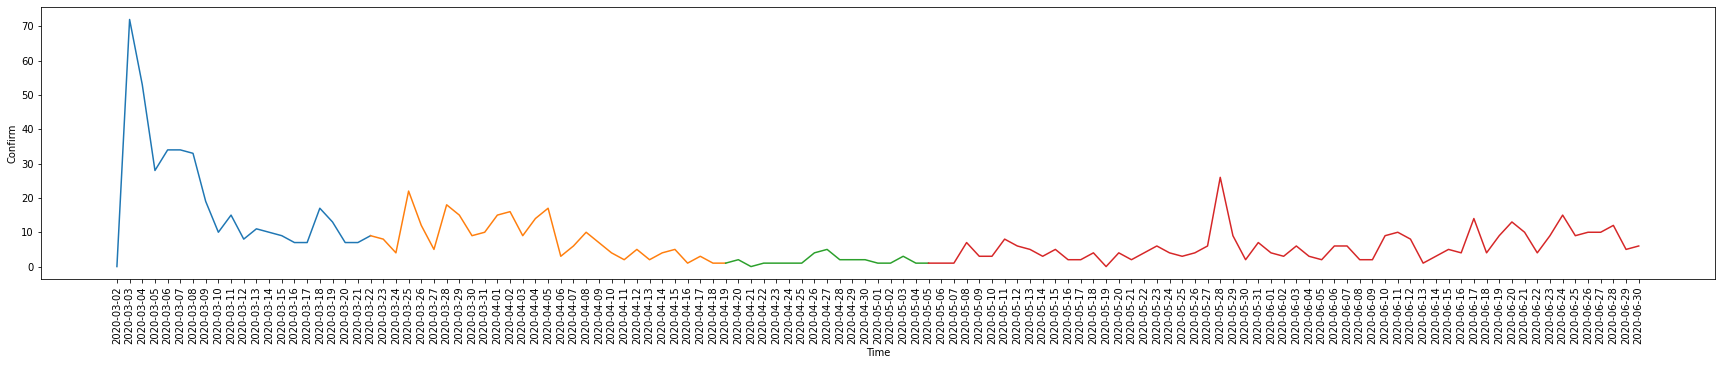

In [47]:
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_distance_30['date'], before_distance_30['confirmed'])
plt.plot(strong_distance_30['date'], strong_distance_30['confirmed'])
plt.plot(weak_distance_30['date'], weak_distance_30['confirmed'])
plt.plot(after_distance_30['date'], after_distance_30['confirmed'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

사망자 수

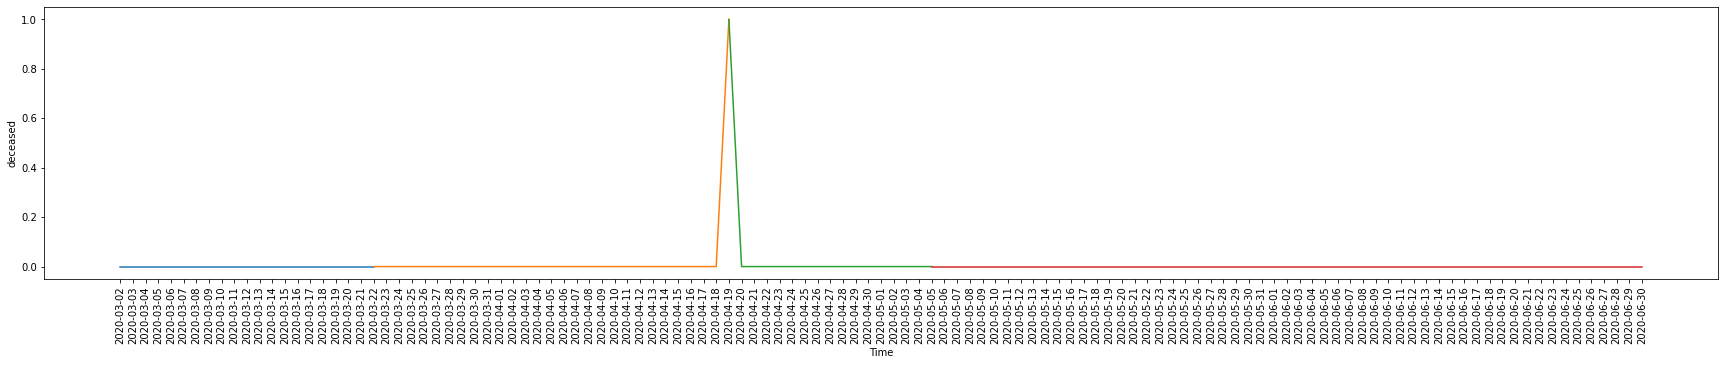

In [48]:
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_distance_30['date'], before_distance_30['deceased'])
plt.plot(strong_distance_30['date'], strong_distance_30['deceased'])
plt.plot(weak_distance_30['date'], weak_distance_30['deceased'])
plt.plot(after_distance_30['date'], after_distance_30['deceased'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('deceased')
plt.show()

5) 40대

확진자 수

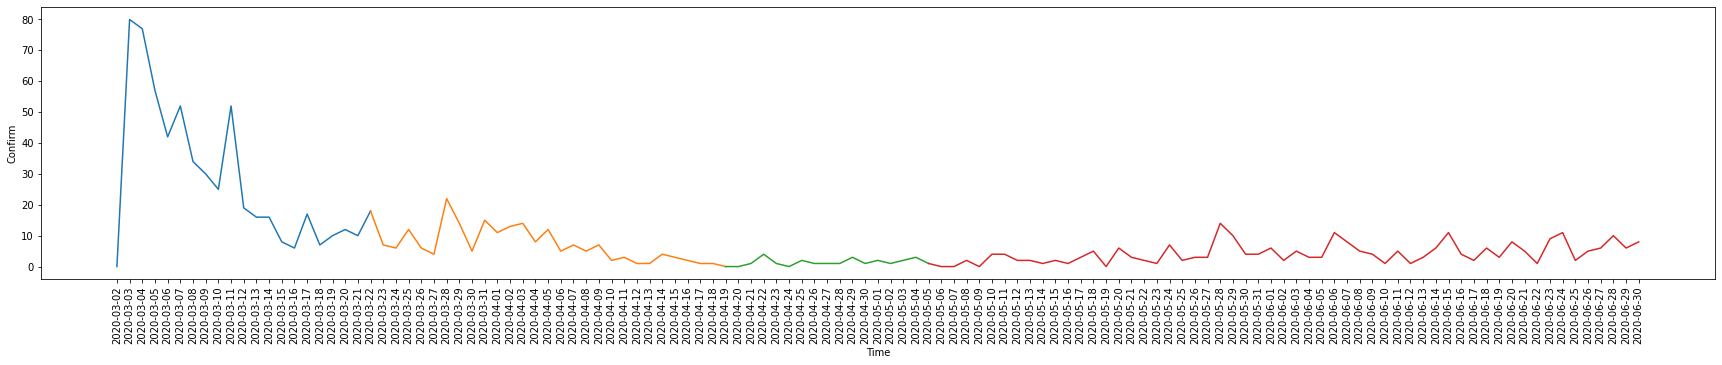

In [49]:
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_distance_40['date'], before_distance_40['confirmed'])
plt.plot(strong_distance_40['date'], strong_distance_40['confirmed'])
plt.plot(weak_distance_40['date'], weak_distance_40['confirmed'])
plt.plot(after_distance_40['date'], after_distance_40['confirmed'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

사망자 수

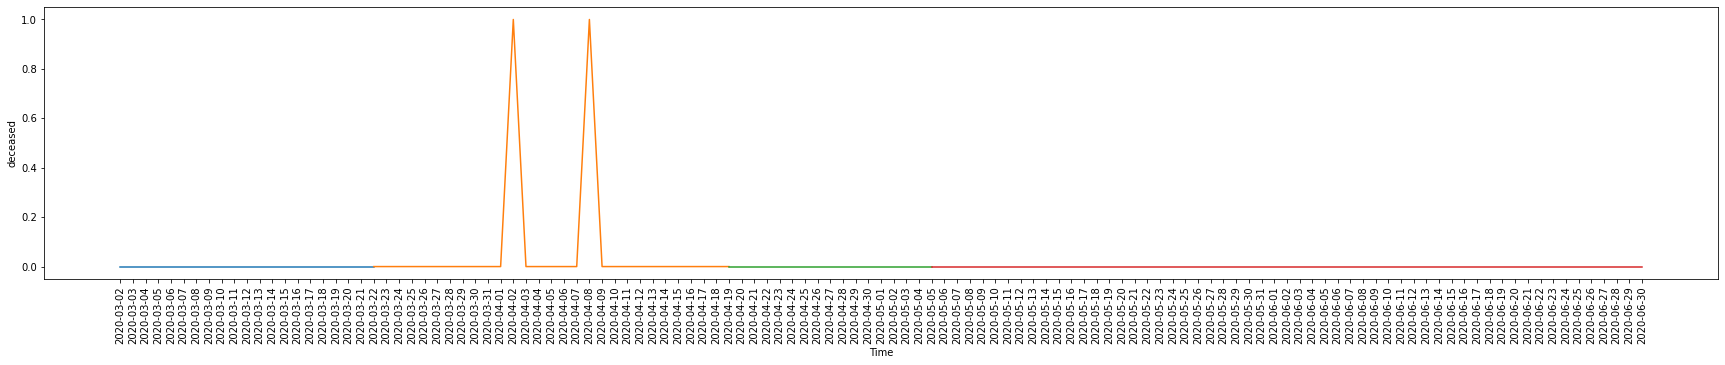

In [50]:
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_distance_40['date'], before_distance_40['deceased'])
plt.plot(strong_distance_40['date'], strong_distance_40['deceased'])
plt.plot(weak_distance_40['date'], weak_distance_40['deceased'])
plt.plot(after_distance_40['date'], after_distance_40['deceased'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('deceased')
plt.show()

6) 50대

확진자 수

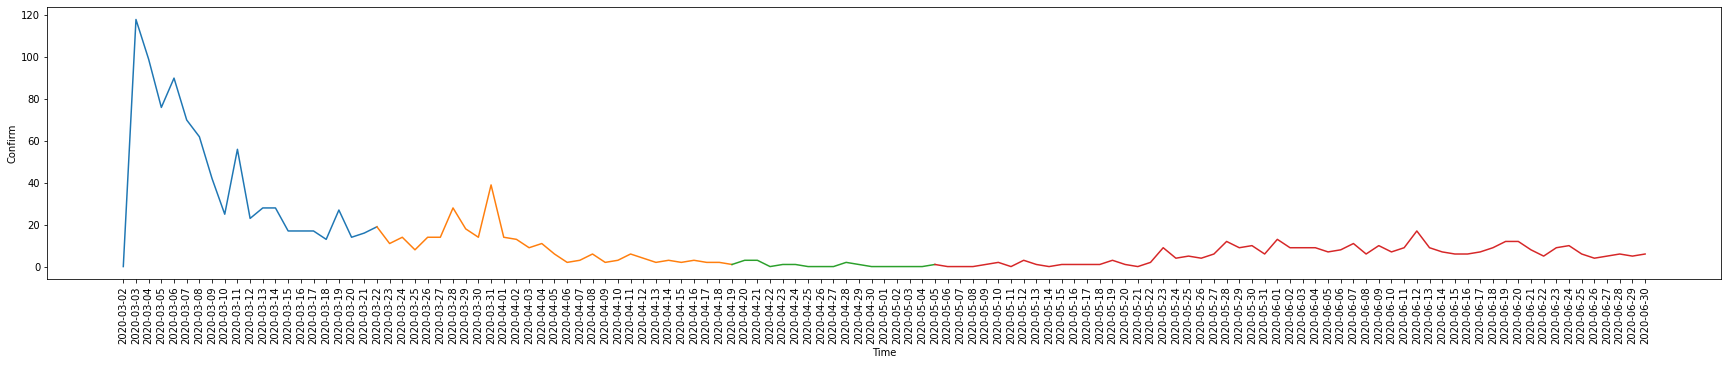

In [51]:
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_distance_50['date'], before_distance_50['confirmed'])
plt.plot(strong_distance_50['date'], strong_distance_50['confirmed'])
plt.plot(weak_distance_50['date'], weak_distance_50['confirmed'])
plt.plot(after_distance_50['date'], after_distance_50['confirmed'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

사망자 수

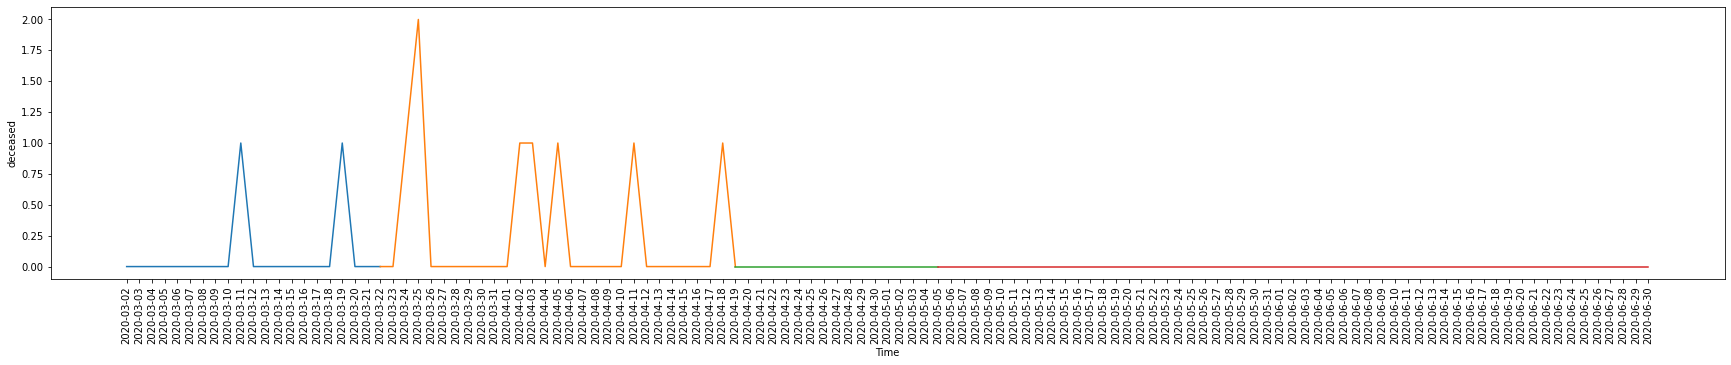

In [52]:
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_distance_50['date'], before_distance_50['deceased'])
plt.plot(strong_distance_50['date'], strong_distance_50['deceased'])
plt.plot(weak_distance_50['date'], weak_distance_50['deceased'])
plt.plot(after_distance_50['date'], after_distance_50['deceased'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('deceased')
plt.show()

7) 60대

확진자 수

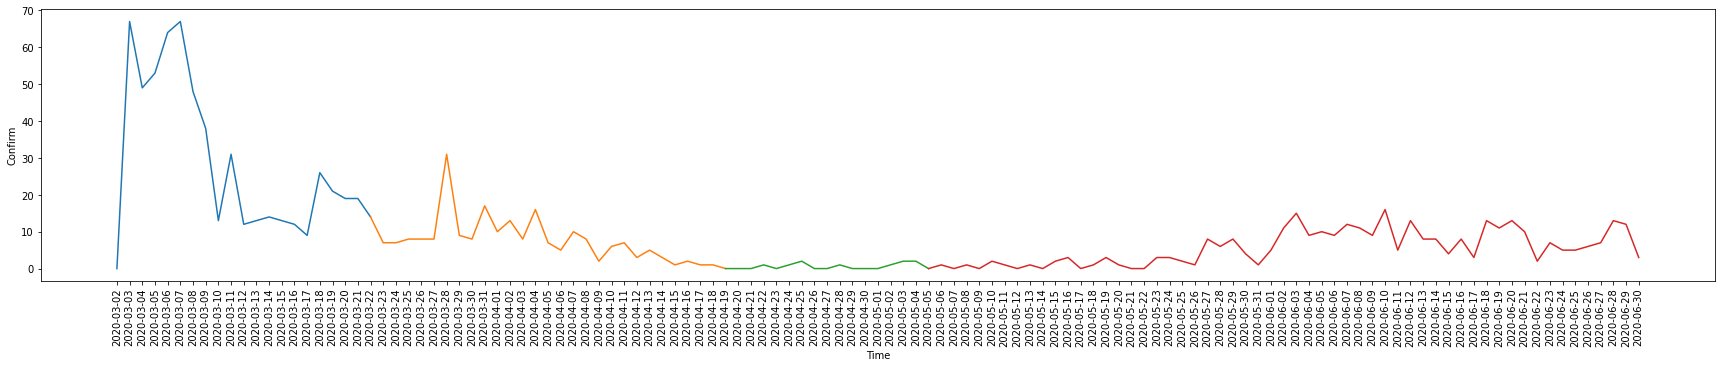

In [53]:
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_distance_60['date'], before_distance_60['confirmed'])
plt.plot(strong_distance_60['date'], strong_distance_60['confirmed'])
plt.plot(weak_distance_60['date'], weak_distance_60['confirmed'])
plt.plot(after_distance_60['date'], after_distance_60['confirmed'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

사망자 수

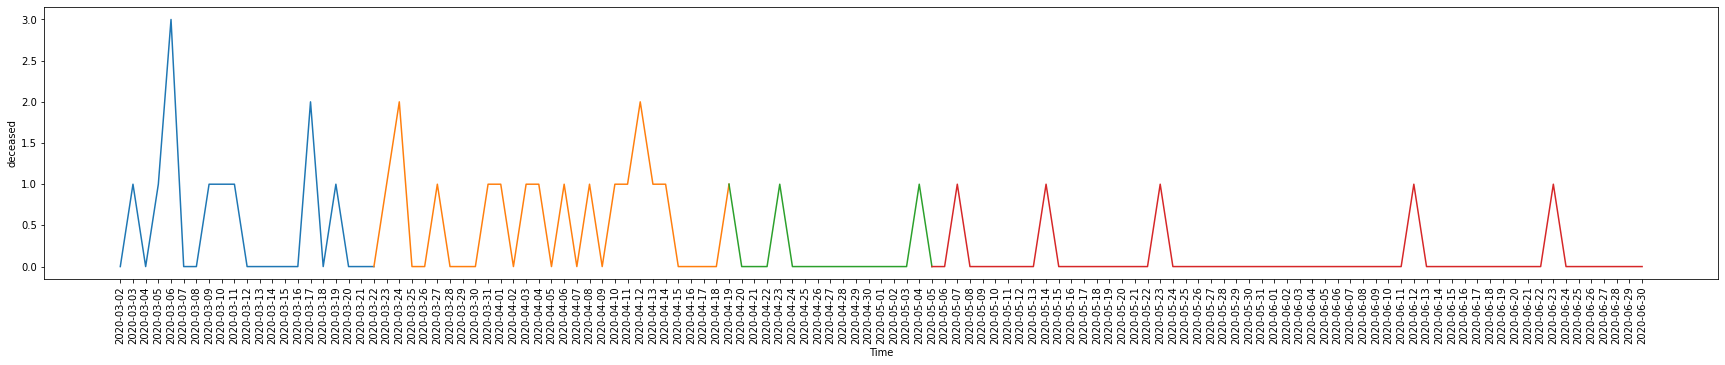

In [54]:
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_distance_60['date'], before_distance_60['deceased'])
plt.plot(strong_distance_60['date'], strong_distance_60['deceased'])
plt.plot(weak_distance_60['date'], weak_distance_60['deceased'])
plt.plot(after_distance_60['date'], after_distance_60['deceased'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('deceased')
plt.show()

8) 70대

확진자 수

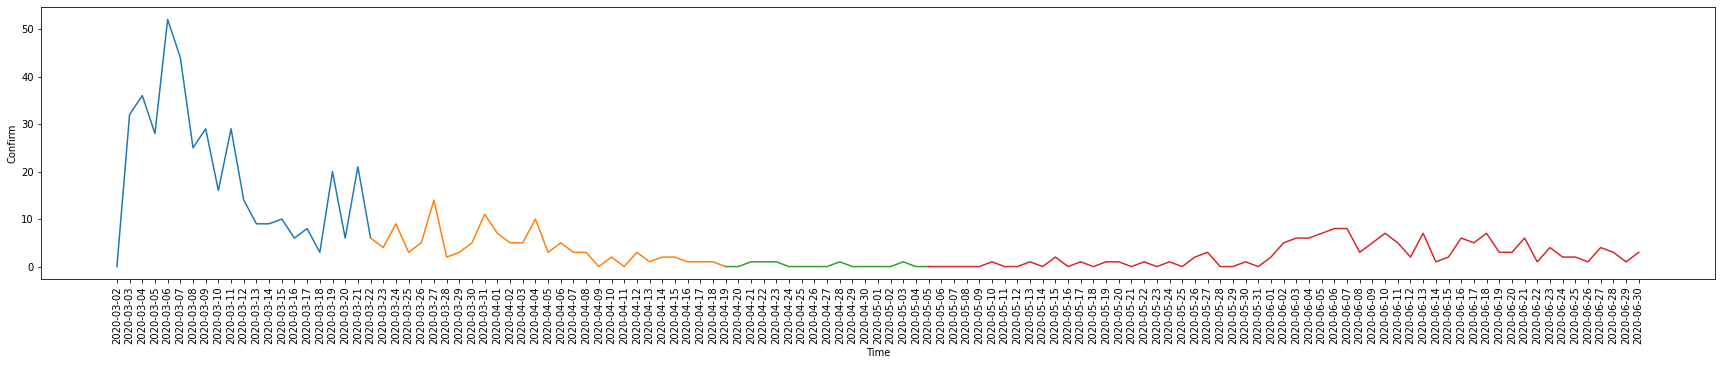

In [55]:
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_distance_70['date'], before_distance_70['confirmed'])
plt.plot(strong_distance_70['date'], strong_distance_70['confirmed'])
plt.plot(weak_distance_70['date'], weak_distance_70['confirmed'])
plt.plot(after_distance_70['date'], after_distance_70['confirmed'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

사망자 수

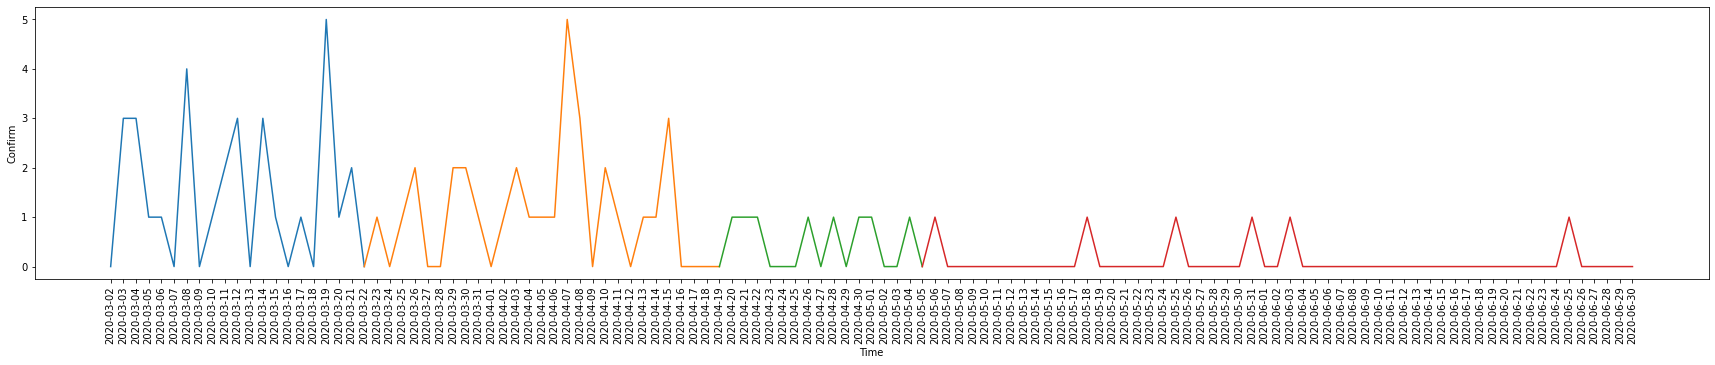

In [56]:
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_distance_70['date'], before_distance_70['deceased'])
plt.plot(strong_distance_70['date'], strong_distance_70['deceased'])
plt.plot(weak_distance_70['date'], weak_distance_70['deceased'])
plt.plot(after_distance_70['date'], after_distance_70['deceased'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

9) 80대

확진자 수

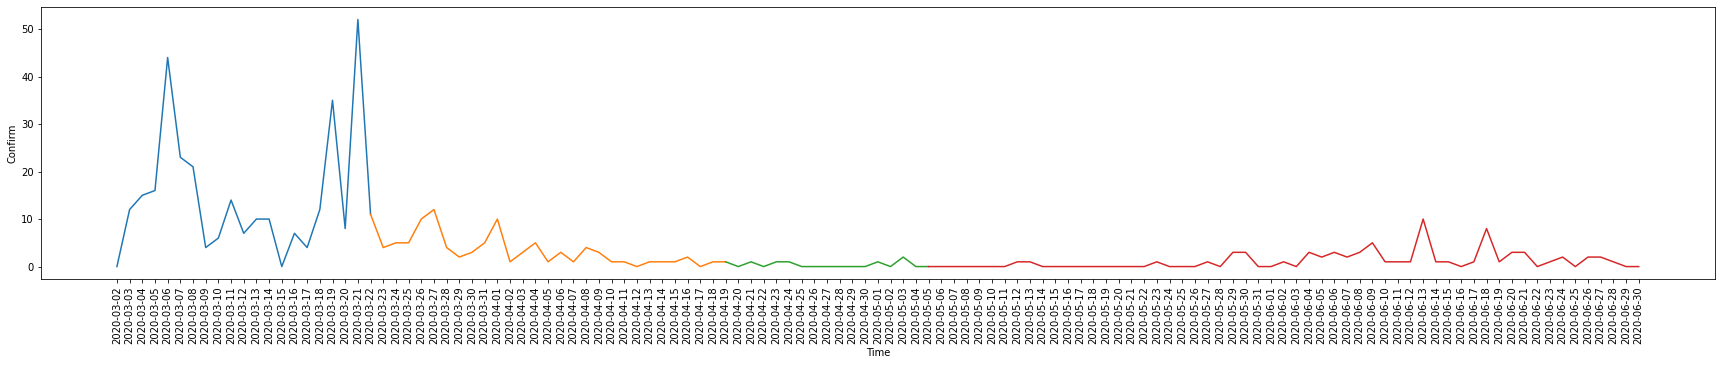

In [57]:
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_distance_80['date'], before_distance_80['confirmed'])
plt.plot(strong_distance_80['date'], strong_distance_80['confirmed'])
plt.plot(weak_distance_80['date'], weak_distance_80['confirmed'])
plt.plot(after_distance_80['date'], after_distance_80['confirmed'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

사망자 수

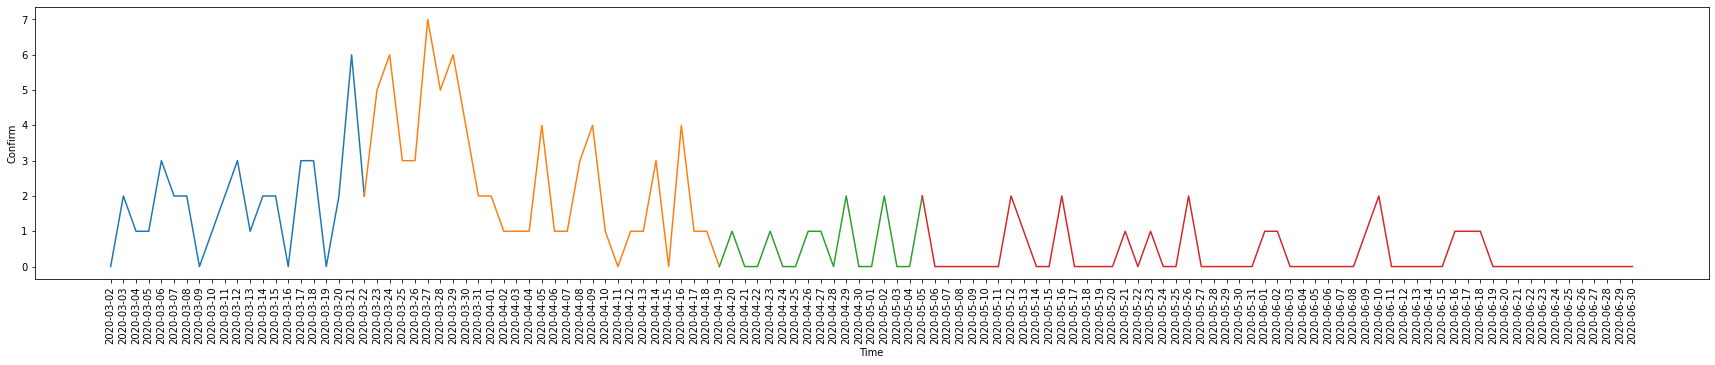

In [58]:
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_distance_80['date'], before_distance_80['deceased'])
plt.plot(strong_distance_80['date'], strong_distance_80['deceased'])
plt.plot(weak_distance_80['date'], weak_distance_80['deceased'])
plt.plot(after_distance_80['date'], after_distance_80['deceased'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

# 초 중 고 오프라인 개학에 따른 확진자의 변화 양상


1. 오프라인 개학 전

In [59]:
Time_recent_date = Time_recent['date']
Time_recent_test = Time_recent['test']
Time_recent_confirmed = Time_recent['confirmed']
Time_recent_deceased = Time_recent['deceased']

In [60]:
confirm_recent_df = pd.DataFrame({'코로나 검사': Time_recent_test, '확진자 수': Time_recent_confirmed, '사망자 수': Time_recent_deceased})
confirm_recent_df = confirm_recent_df.diff(1, axis=0)
confirm_recent_df['날짜'] = Time_recent_date
confirm_recent_df.iloc[0, :2] = 1

In [61]:
before_school_df = confirm_recent_df.iloc[101:122]
before_school_10s_df = TimeAge_10s.iloc[59:80]
before_school_0s_df = TimeAge_0s.iloc[59:80]

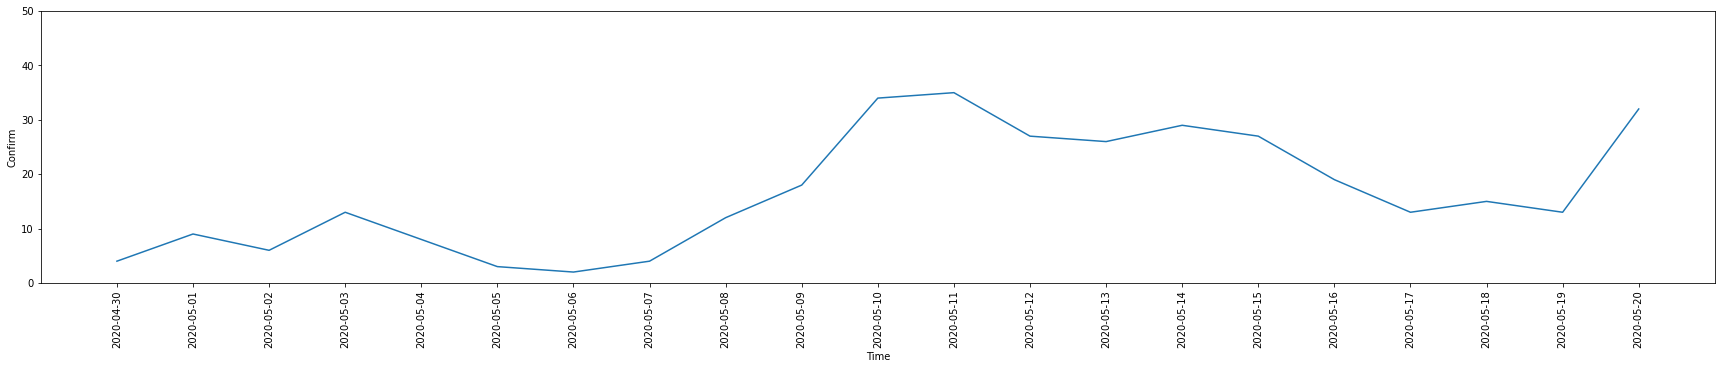

In [62]:
#날짜별 코로나 확진자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_school_df['날짜'], before_school_df['확진자 수'])
plt.xticks(rotation=90)
plt.ylim(0, 50)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

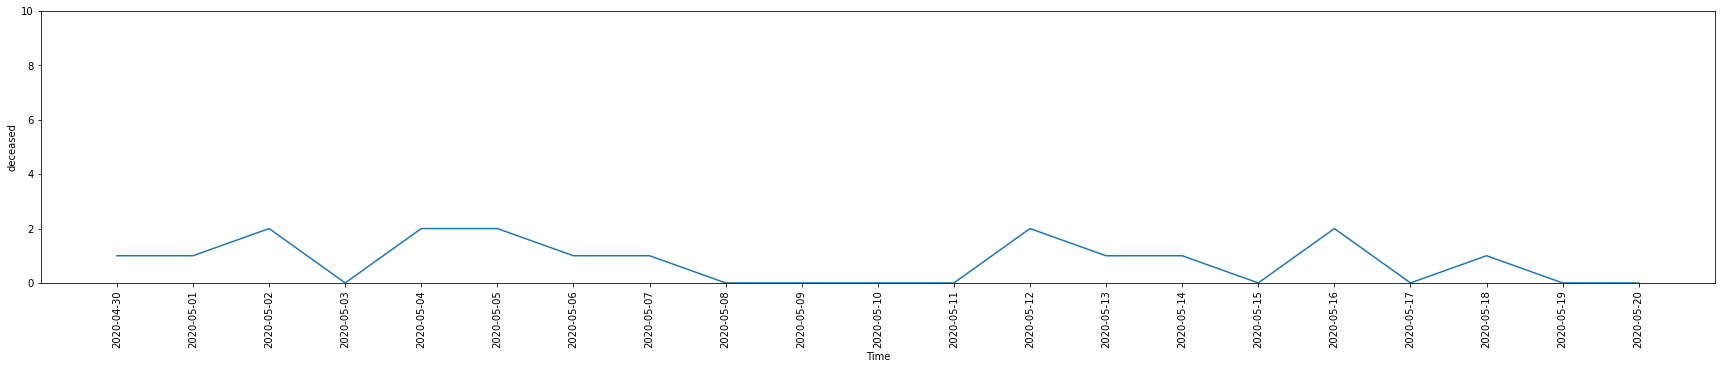

In [63]:
#날짜별 코로나 사망자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_school_df['날짜'], before_school_df['사망자 수'])
plt.xticks(rotation=90)
plt.ylim(0, 10)
plt.xlabel('Time')
plt.ylabel('deceased')
plt.show()

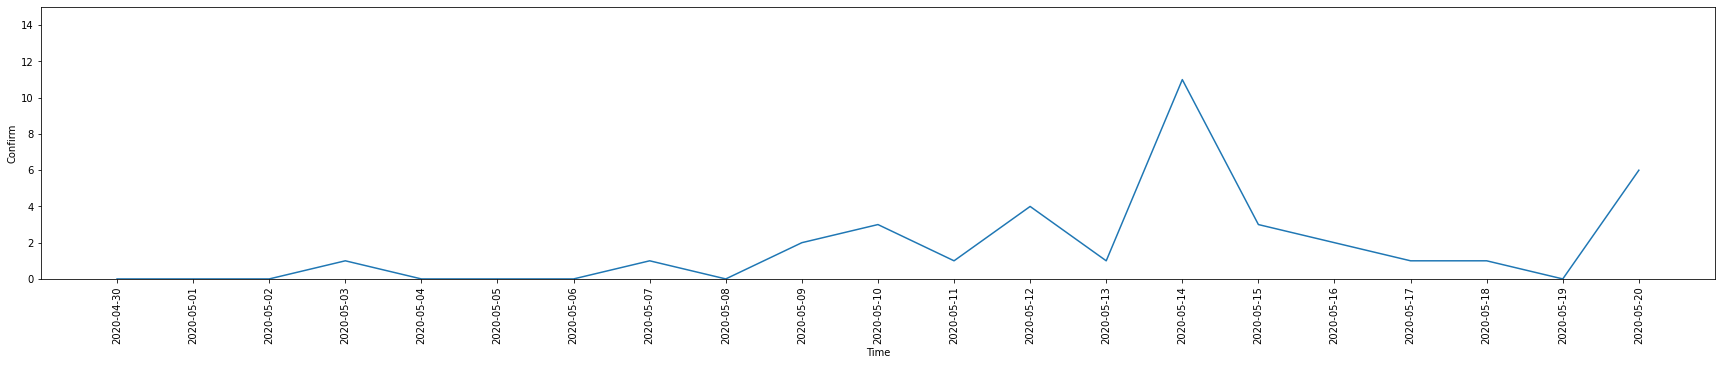

In [64]:
#날짜별 10대 코로나 확진자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_school_10s_df['date'], before_school_10s_df['confirmed'])
plt.xticks(rotation=90)
plt.ylim(0, 15)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

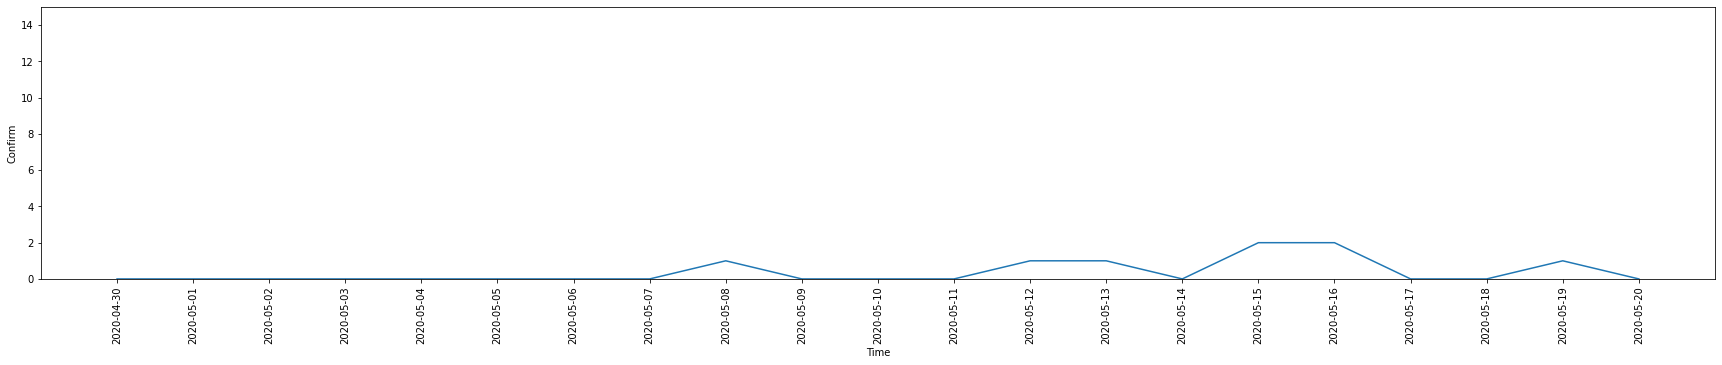

In [65]:
#날짜별 10대 이하 코로나 확진자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_school_0s_df['date'], before_school_0s_df['confirmed'])
plt.xticks(rotation=90)
plt.ylim(0, 15)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

2. 고3 등교

In [66]:
high_3_school = confirm_recent_df.iloc[121:129]
high_3_school_10s_df = TimeAge_10s.iloc[79:87]
high_3_school_0s_df = TimeAge_0s.iloc[79:87]

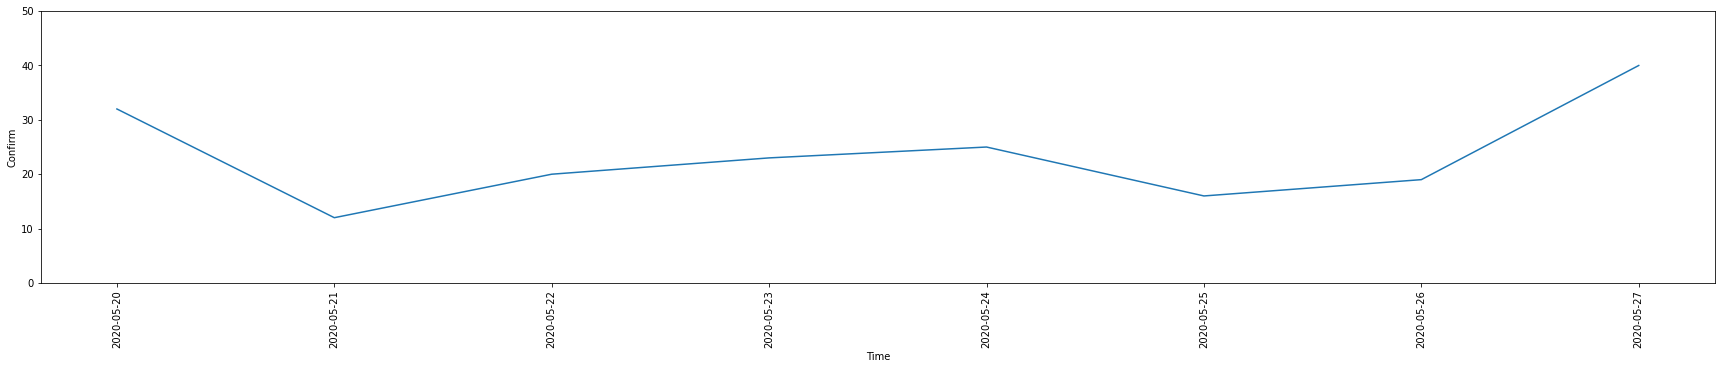

In [67]:
#날짜별 코로나 확진자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(high_3_school['날짜'], high_3_school['확진자 수'])
plt.xticks(rotation=90)
plt.ylim(0, 50)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

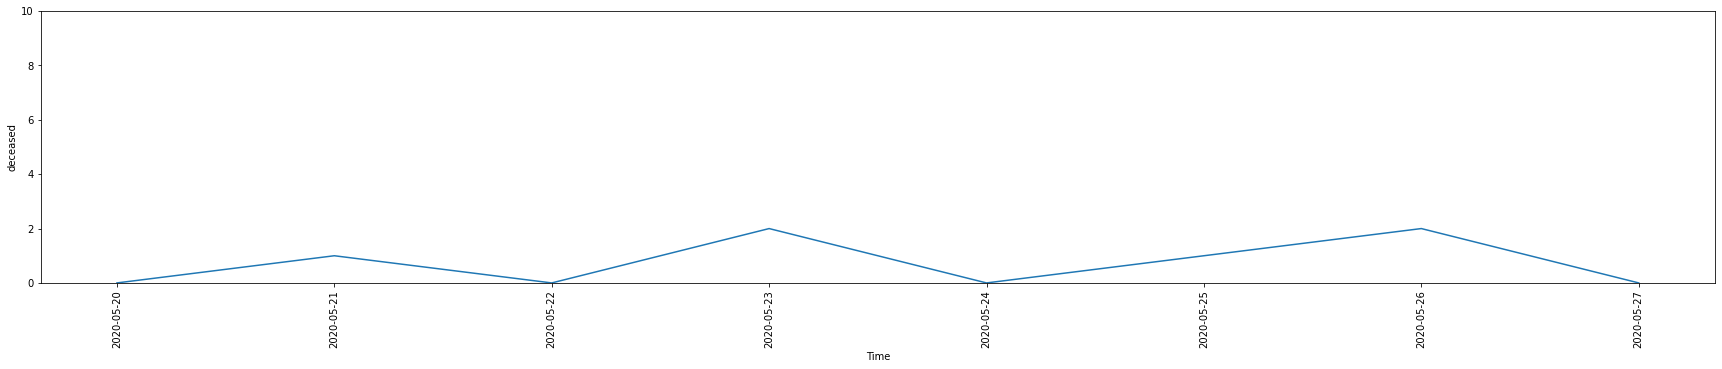

In [68]:
#날짜별 코로나 사망자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(high_3_school['날짜'], high_3_school['사망자 수'])
plt.xticks(rotation=90)
plt.ylim(0, 10)
plt.xlabel('Time')
plt.ylabel('deceased')
plt.show()

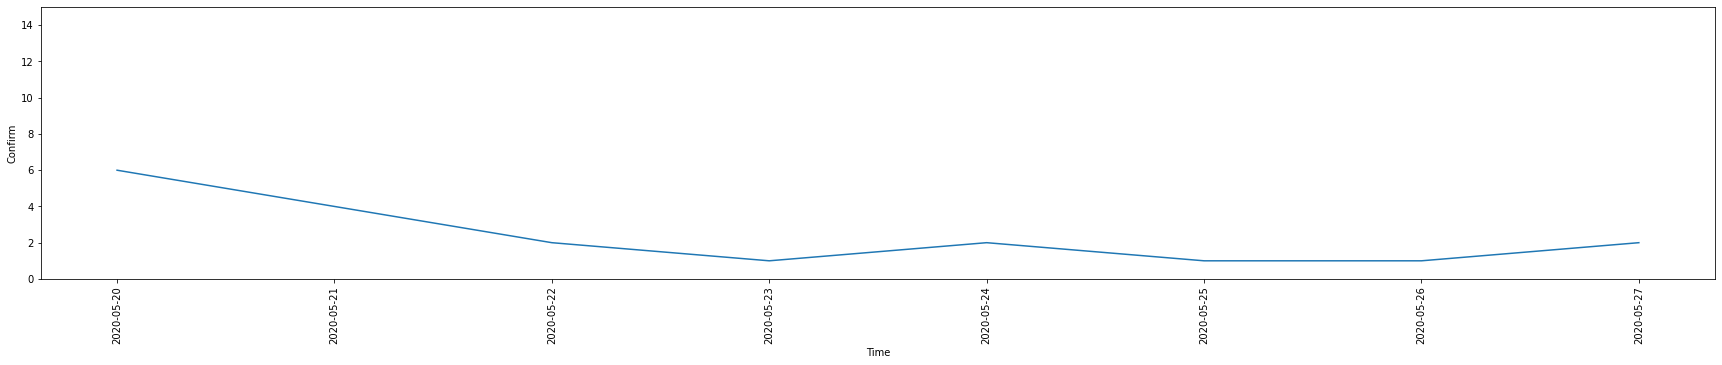

In [69]:
#날짜별 10대 코로나 확진자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(high_3_school_10s_df['date'], high_3_school_10s_df['confirmed'])
plt.xticks(rotation=90)
plt.ylim(0, 15)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

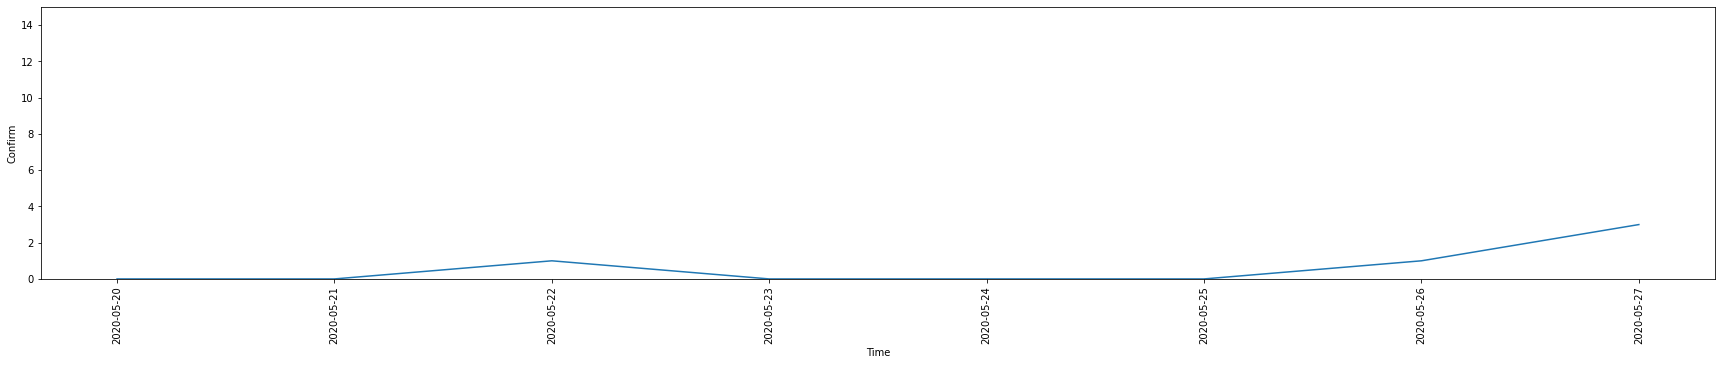

In [70]:
#날짜별 10대 이하 코로나 확진자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(high_3_school_0s_df['date'], high_3_school_0s_df['confirmed'])
plt.xticks(rotation=90)
plt.ylim(0, 15)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

3. 고2, 중3, 초1-2, 유치원 등교

In [71]:
high_2_school = confirm_recent_df.iloc[128:136]
high_2_school_10s_df = TimeAge_10s.iloc[86:94]
high_2_school_0s_df = TimeAge_0s.iloc[86:94]

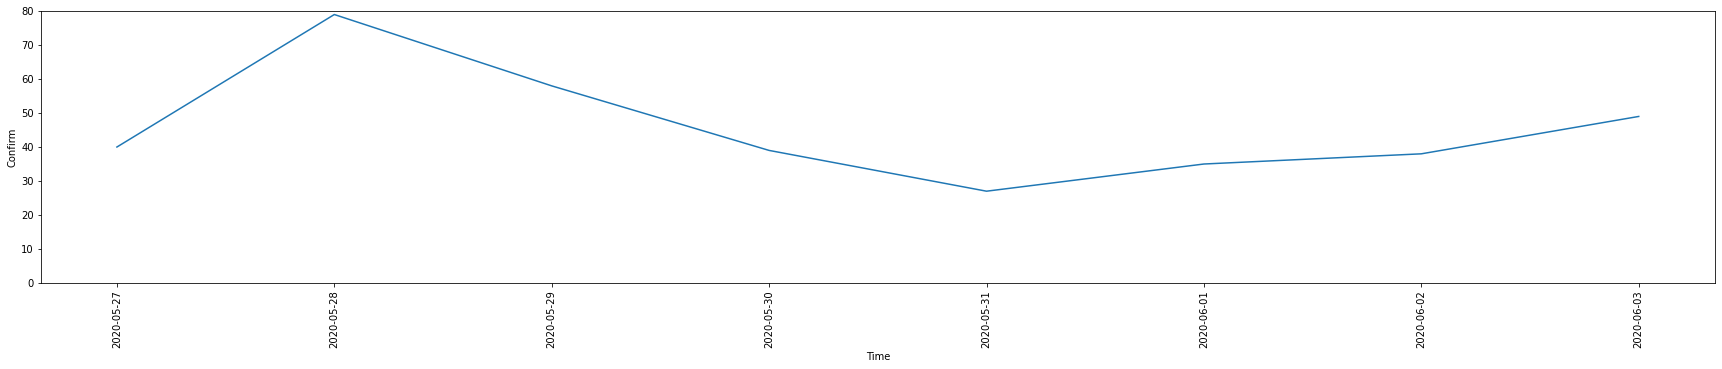

In [72]:
#날짜별 코로나 확진자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(high_2_school['날짜'], high_2_school['확진자 수'])
plt.xticks(rotation=90)
plt.ylim(0, 80)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

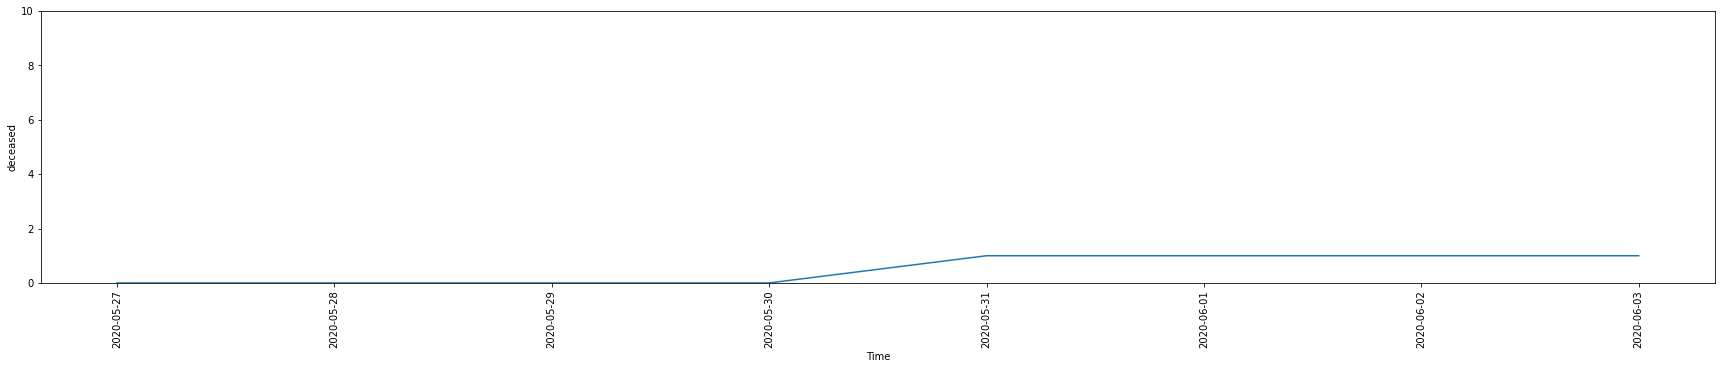

In [73]:
#날짜별 코로나 사망자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(high_2_school['날짜'], high_2_school['사망자 수'])
plt.xticks(rotation=90)
plt.ylim(0, 10)
plt.xlabel('Time')
plt.ylabel('deceased')
plt.show()

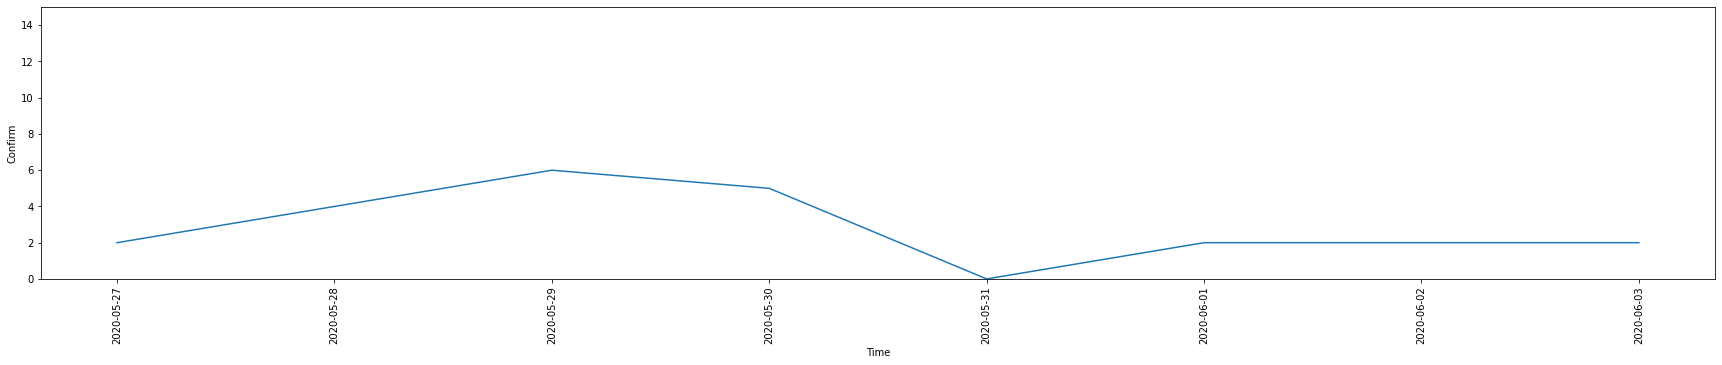

In [74]:
#날짜별 10대 코로나 확진자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(high_2_school_10s_df['date'], high_2_school_10s_df['confirmed'])
plt.xticks(rotation=90)
plt.ylim(0, 15)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

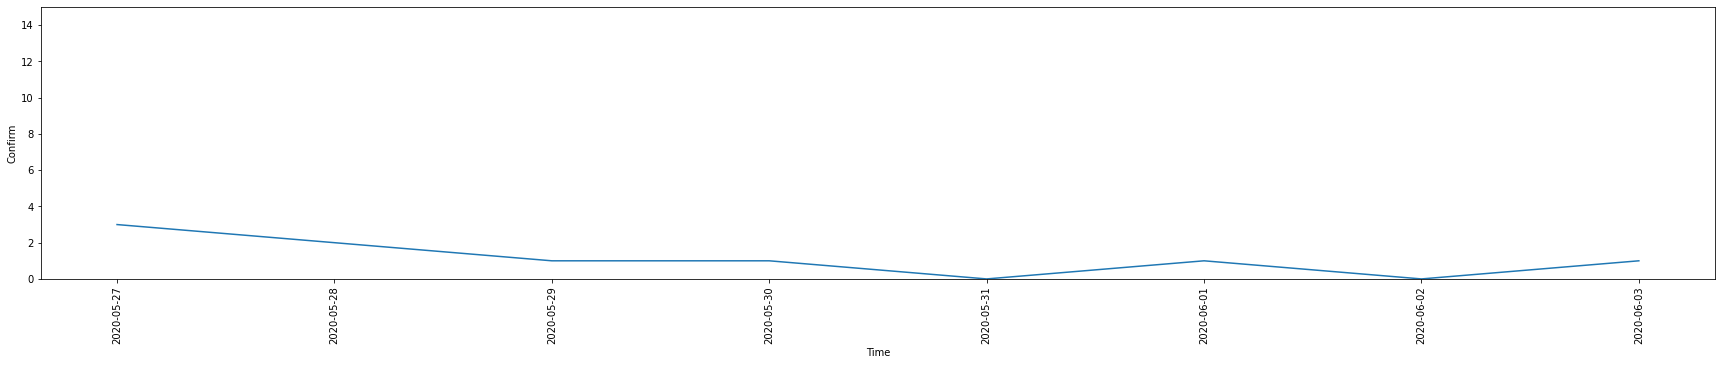

In [75]:
#날짜별 10대 이하 코로나 확진자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(high_2_school_0s_df['date'], high_2_school_0s_df['confirmed'])
plt.xticks(rotation=90)
plt.ylim(0, 15)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

4. 고1, 중2, 초3-4 등교

In [76]:
high_1_school = confirm_recent_df.iloc[135:143]
high_1_school_10s_df = TimeAge_10s.iloc[93:101]
high_1_school_0s_df = TimeAge_0s.iloc[93:101]

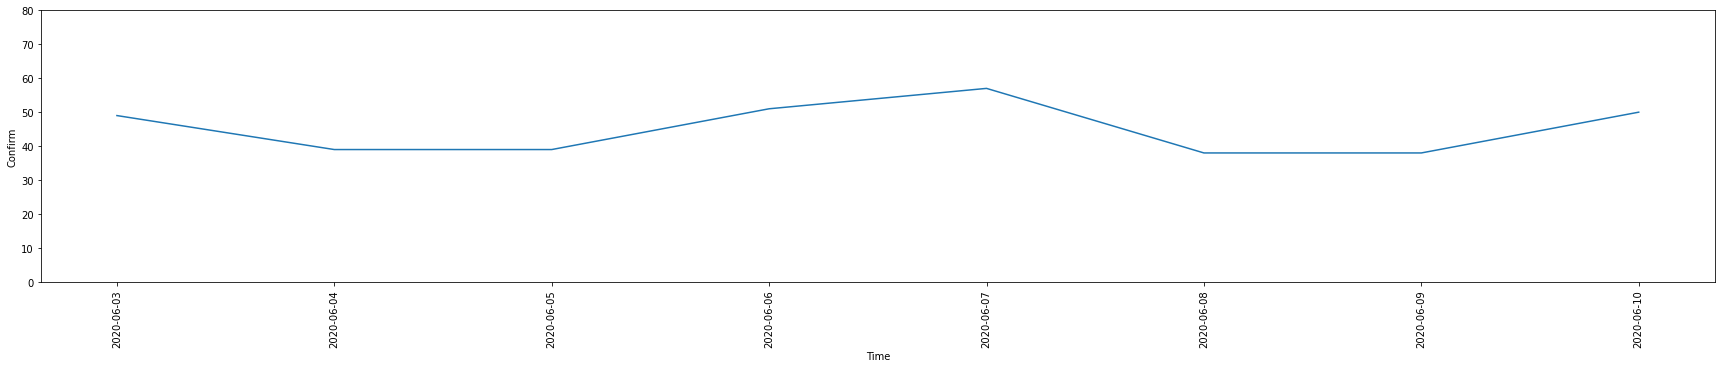

In [77]:
#날짜별 코로나 확진자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(high_1_school['날짜'], high_1_school['확진자 수'])
plt.xticks(rotation=90)
plt.ylim(0, 80)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

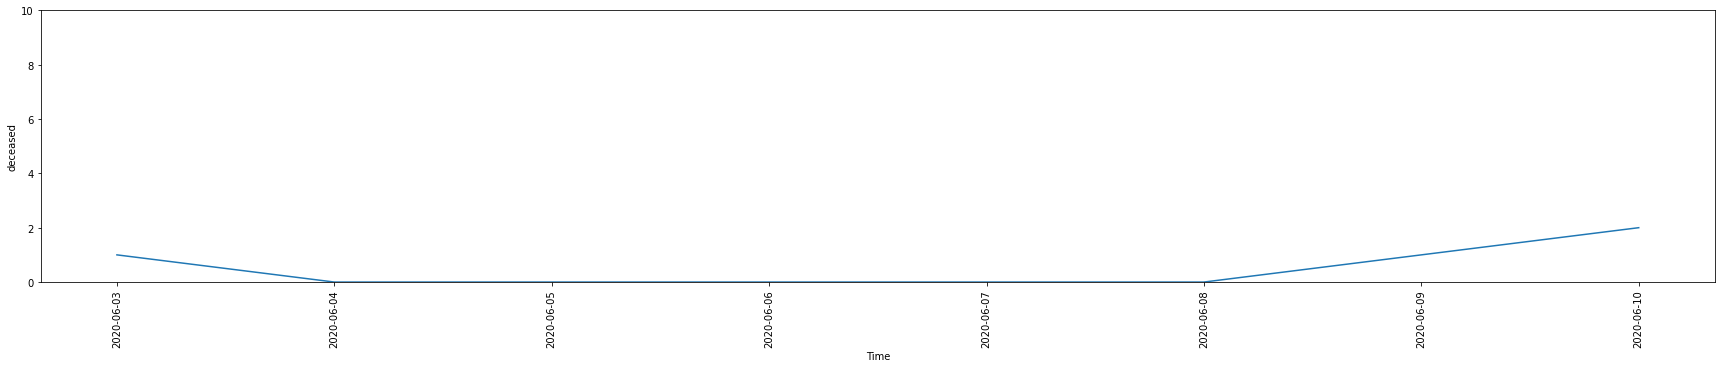

In [78]:
#날짜별 코로나 사망자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(high_1_school['날짜'], high_1_school['사망자 수'])
plt.xticks(rotation=90)
plt.ylim(0, 10)
plt.xlabel('Time')
plt.ylabel('deceased')
plt.show()

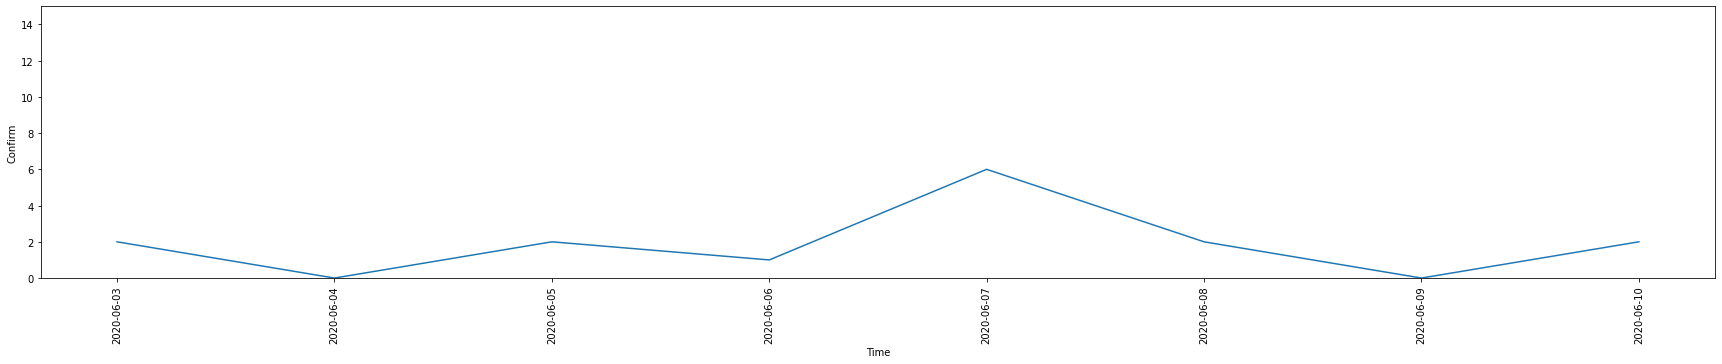

In [79]:
#날짜별 10대 코로나 확진자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(high_1_school_10s_df['date'], high_1_school_10s_df['confirmed'])
plt.xticks(rotation=90)
plt.ylim(0, 15)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

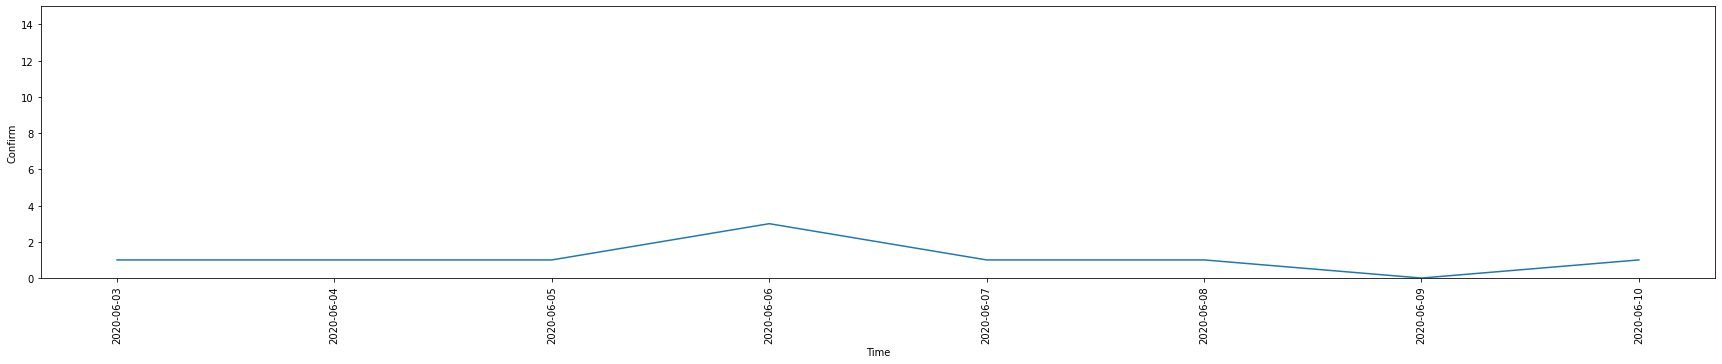

In [80]:
#날짜별 10대 이하 코로나 확진자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(high_1_school_0s_df['date'], high_1_school_0s_df['confirmed'])
plt.xticks(rotation=90)
plt.ylim(0, 15)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

5. 중1, 초5-6 등교, 그리고 그 이후

In [129]:
middle_school = total_confirmed.iloc[130:]
middle_school_10s_df = TimeAge_10s.iloc[100:]
middle_school_0s_df = TimeAge_0s.iloc[100:]
middle_school

,Unnamed: 0,date,accumulate,daily,death,released
130,130,06/10,11902,50,276,10611
131,131,06/11,11947,45,276,10654
132,132,06/12,12003,56,277,10669
133,133,06/13,12051,48,277,10691
134,134,06/14,12085,34,277,10718
...,...,...,...,...,...,...
211,211,08/30,19699,299,323,14903
212,212,08/31,19947,248,324,14973
213,213,09/01,20182,235,324,15198
214,214,09/02,20449,267,326,15356


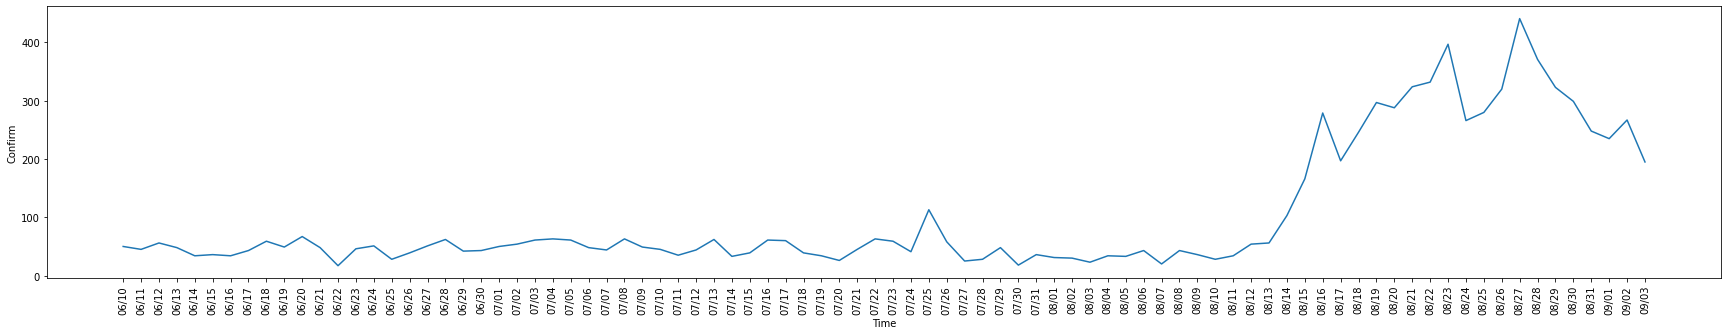

In [131]:
#날짜별 코로나 확진자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(middle_school['date'], middle_school['daily'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

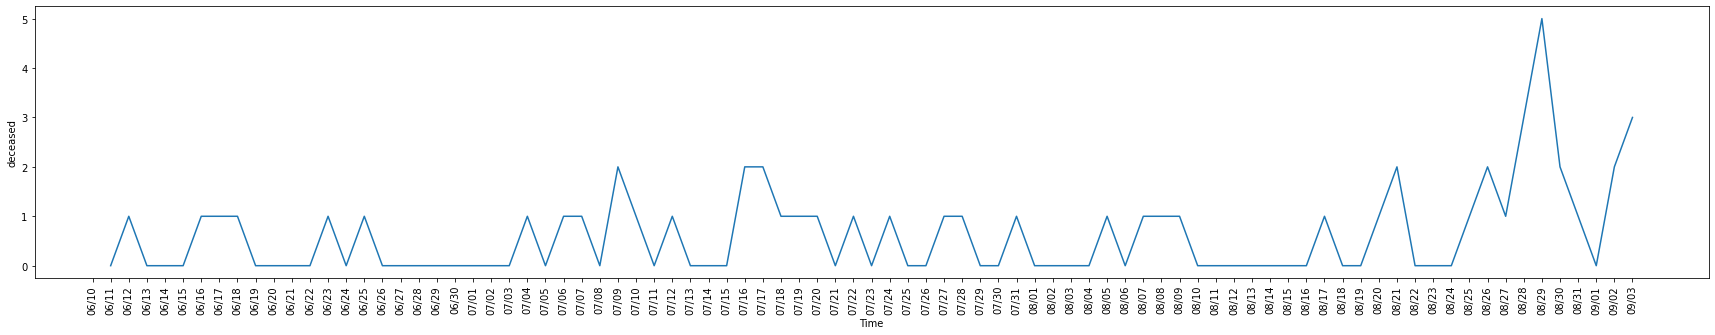

In [134]:
#날짜별 코로나 사망자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(middle_school['date'], middle_school['death'].diff())
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('deceased')
plt.show()

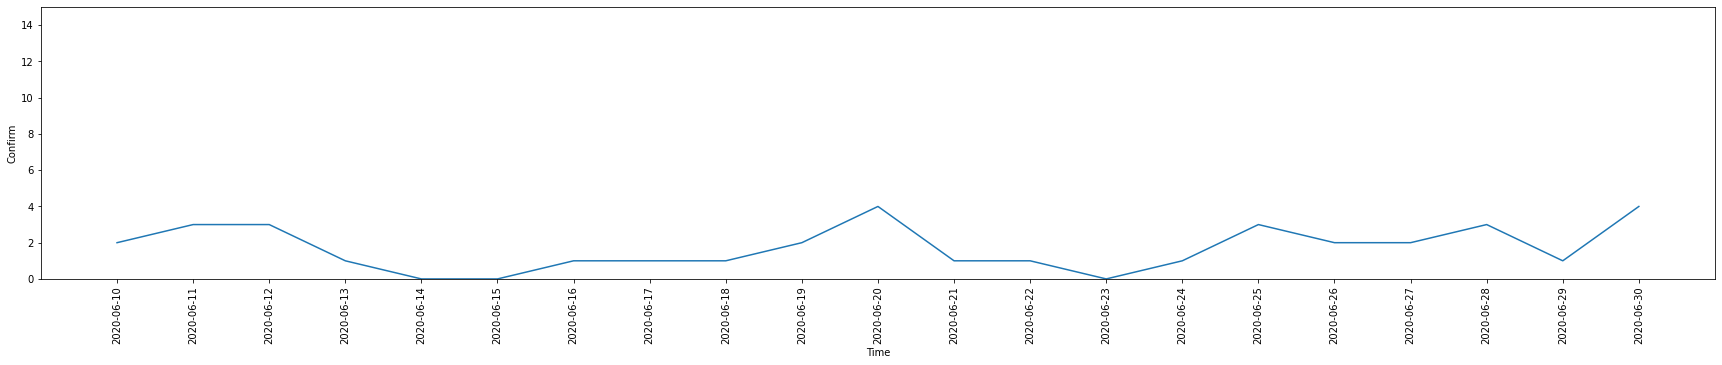

In [84]:
#날짜별 10대 코로나 확진자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(middle_school_10s_df['date'], middle_school_10s_df['confirmed'])
plt.xticks(rotation=90)
plt.ylim(0, 15)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

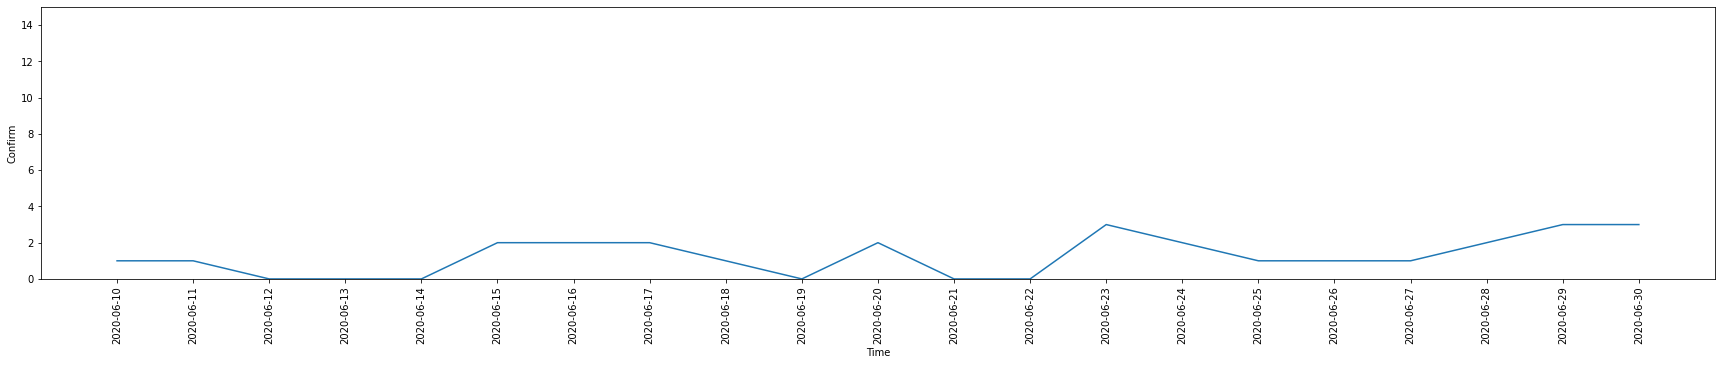

In [85]:
#날짜별 10대 이하 코로나 확진자 수
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(middle_school_0s_df['date'], middle_school_0s_df['confirmed'])
plt.xticks(rotation=90)
plt.ylim(0, 15)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

### 전체적인 그래프 양상

사회적 거리두기
마스크정책
개학
행정명령

1. 코로나 확진자 수

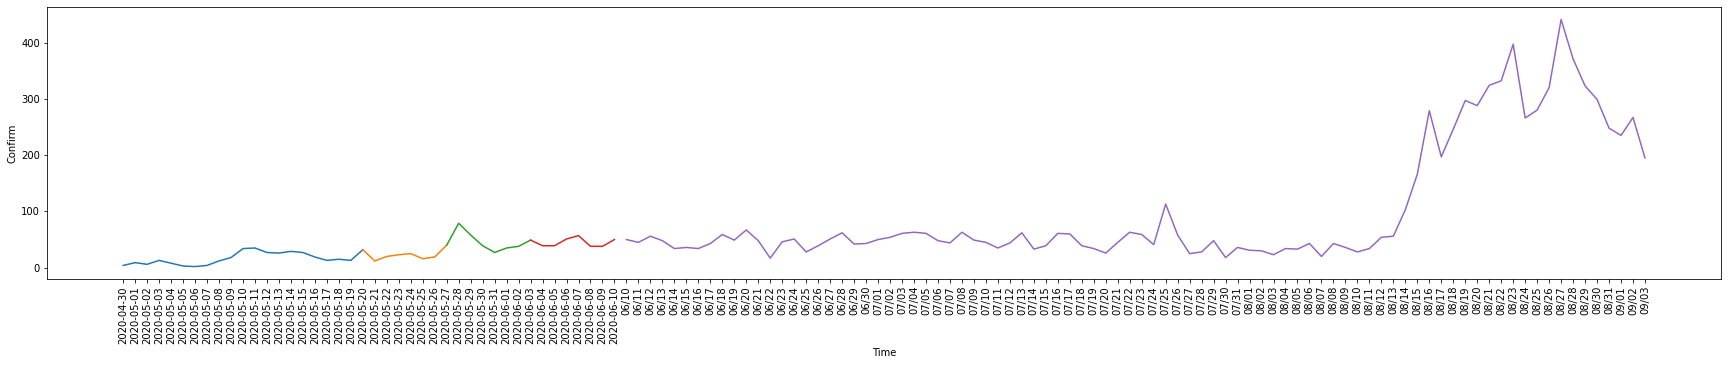

In [136]:
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_school_df['날짜'], before_school_df['확진자 수'])
plt.plot(high_3_school['날짜'], high_3_school['확진자 수'])
plt.plot(high_2_school['날짜'], high_2_school['확진자 수'])
plt.plot(high_1_school['날짜'], high_1_school['확진자 수'])
plt.plot(middle_school['date'], middle_school['daily'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

2. 코로나 사망자 수

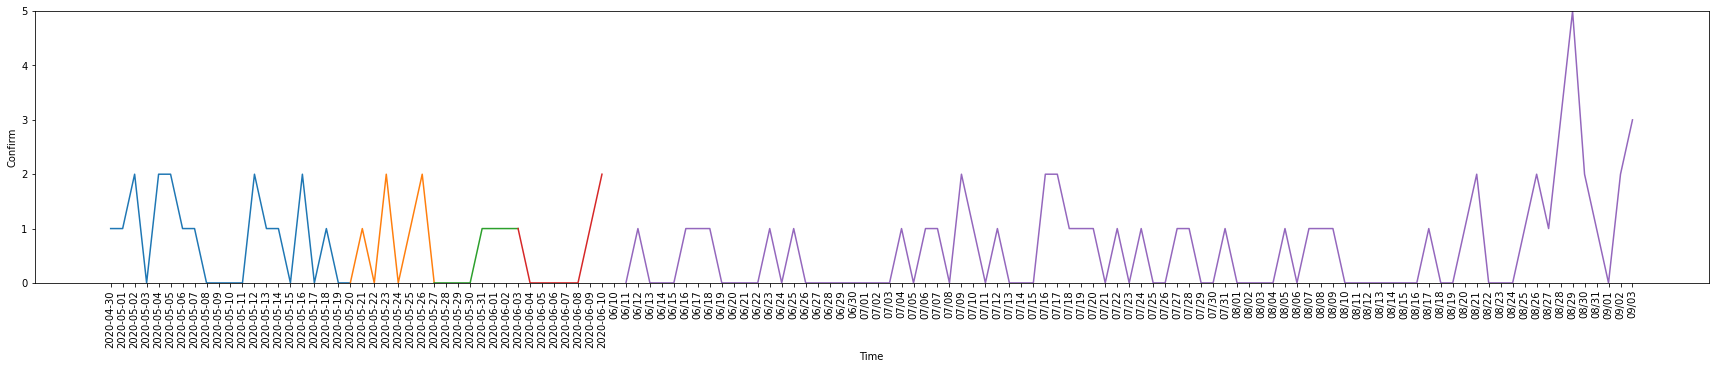

In [137]:
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_school_df['날짜'], before_school_df['사망자 수'])
plt.plot(high_3_school['날짜'], high_3_school['사망자 수'])
plt.plot(high_2_school['날짜'], high_2_school['사망자 수'])
plt.plot(high_1_school['날짜'], high_1_school['사망자 수'])
plt.plot(middle_school['date'], middle_school['death'].diff())
plt.xticks(rotation=90)
plt.ylim(0, 5)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

3. 10대 코로나 확진자 수

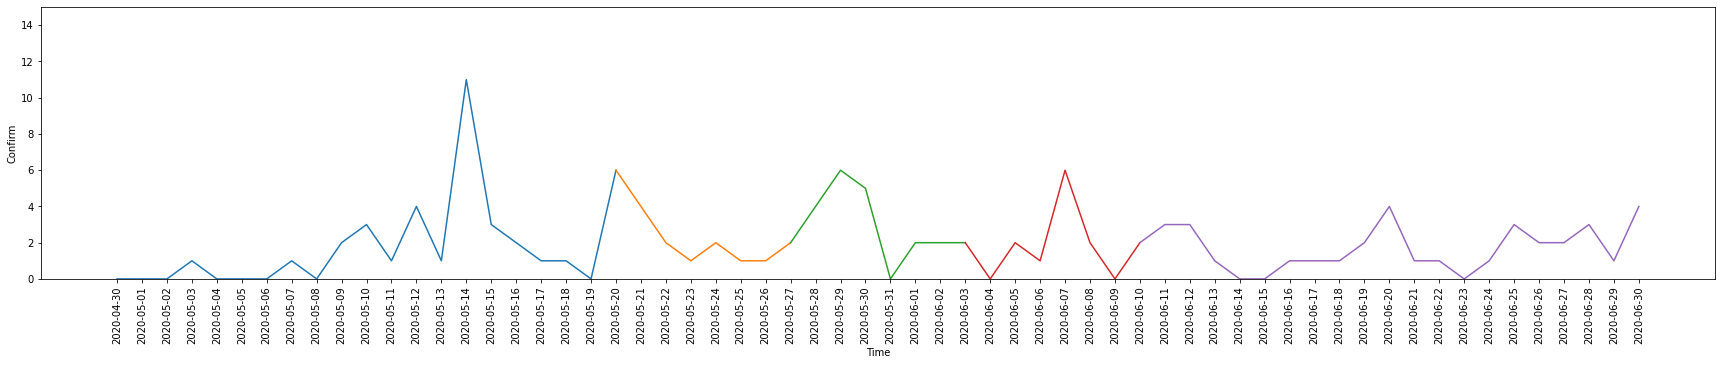

In [88]:
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_school_10s_df['date'], before_school_10s_df['confirmed'])
plt.plot(high_3_school_10s_df['date'], high_3_school_10s_df['confirmed'])
plt.plot(high_2_school_10s_df['date'], high_2_school_10s_df['confirmed'])
plt.plot(high_1_school_10s_df['date'], high_1_school_10s_df['confirmed'])
plt.plot(middle_school_10s_df['date'], middle_school_10s_df['confirmed'])
plt.xticks(rotation=90)
plt.ylim(0, 15)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

4. 10대 이하 코로나 확진자 수

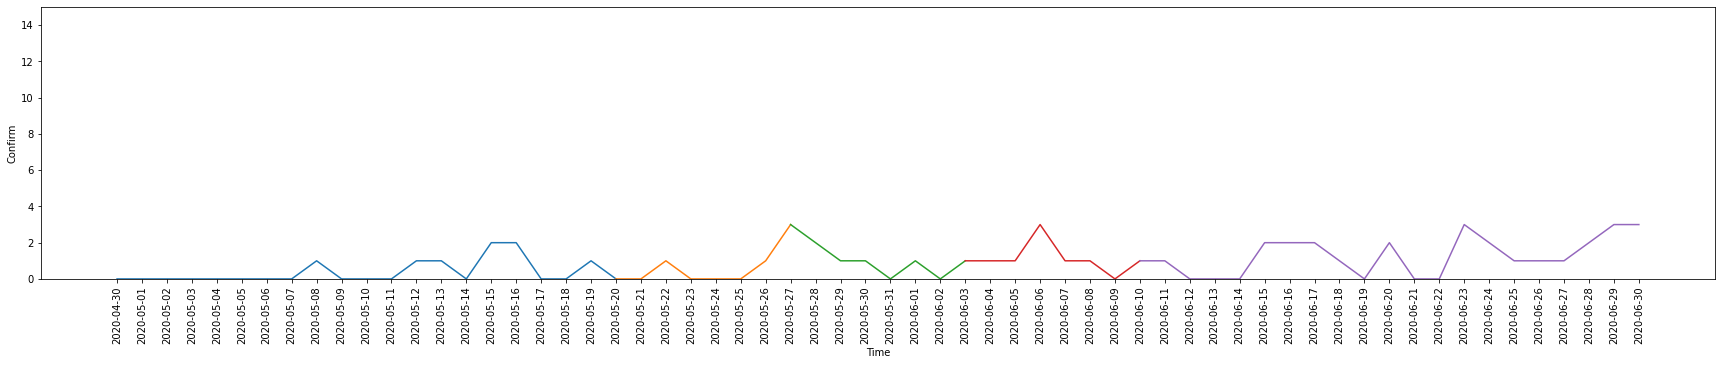

In [89]:
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_school_0s_df['date'], before_school_0s_df['confirmed'])
plt.plot(high_3_school_0s_df['date'], high_3_school_0s_df['confirmed'])
plt.plot(high_2_school_0s_df['date'], high_2_school_0s_df['confirmed'])
plt.plot(high_1_school_0s_df['date'], high_1_school_0s_df['confirmed'])
plt.plot(middle_school_0s_df['date'], middle_school_0s_df['confirmed'])
plt.xticks(rotation=90)
plt.ylim(0, 15)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

# 정부의 행정명령에 따른 확진자 추이

### 행정명령 이전

In [148]:
before_close = total_confirmed.iloc[:98]

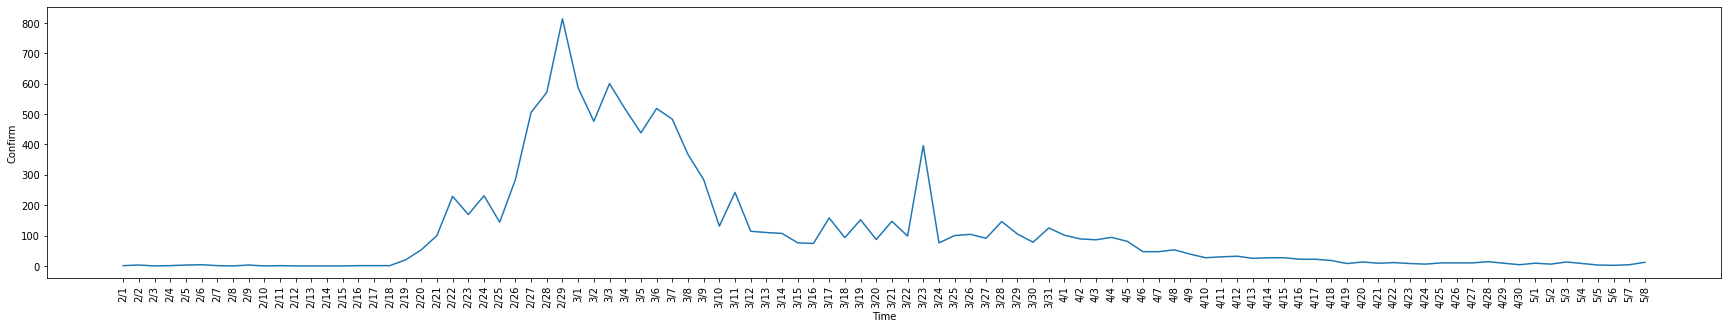

In [149]:
#일일 코로나 확진자 추이
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_close['date'], before_close['daily'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

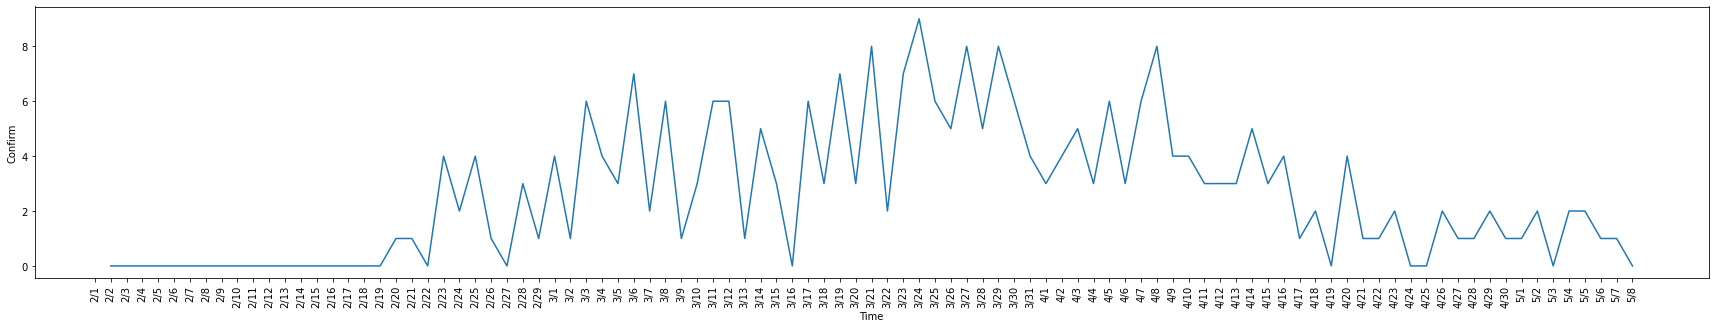

In [150]:
#일일 코로나 사망자 추이
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_close['date'], before_close['death'].diff())
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

### 유흥시설 영업중지

In [144]:
close_club = total_confirmed.iloc[97:128]

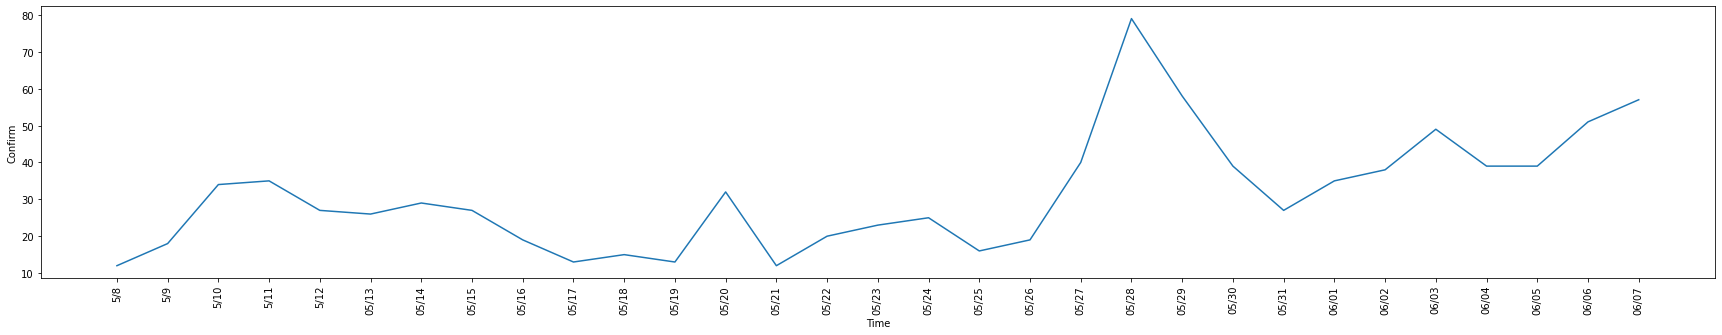

In [146]:
#일일 코로나 확진자 추이
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(close_club['date'], close_club['daily'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

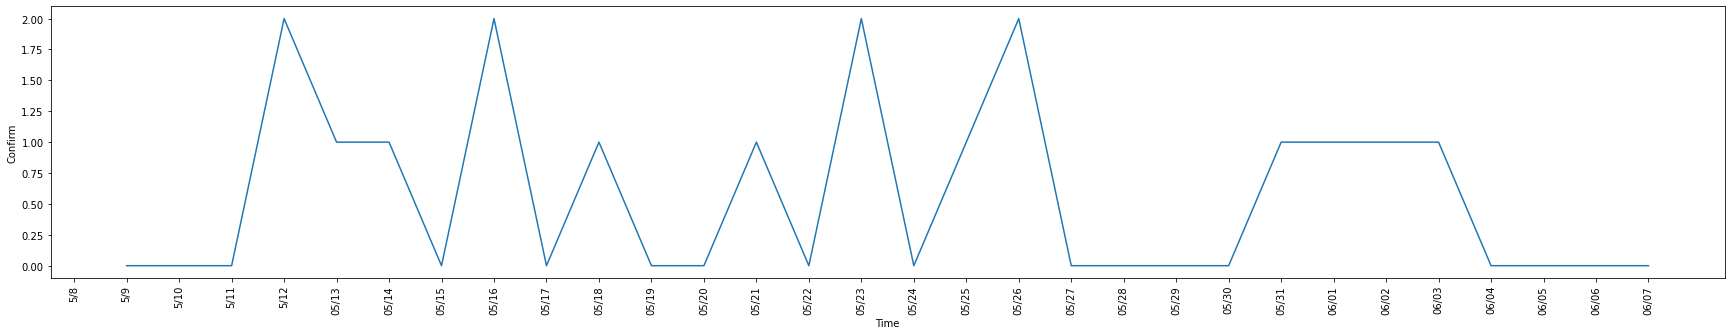

In [147]:
#일일 코로나 사망자 추이
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(close_club['date'], close_club['death'].diff())
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

### 노래방 등 영업 중지

In [152]:
close_karaoke = total_confirmed.iloc[110:123]
close_karaoke

,Unnamed: 0,date,accumulate,daily,death,released
110,110,05/21,11122,12,264,10135
111,111,05/22,11142,20,264,10162
112,112,05/23,11165,23,266,10194
113,113,05/24,11190,25,266,10213
114,114,05/25,11206,16,267,10226
115,115,05/26,11225,19,269,10275
116,116,05/27,11265,40,269,10295
117,117,05/28,11344,79,269,10340
118,118,05/29,11402,58,269,10363
119,119,05/30,11441,39,269,10398


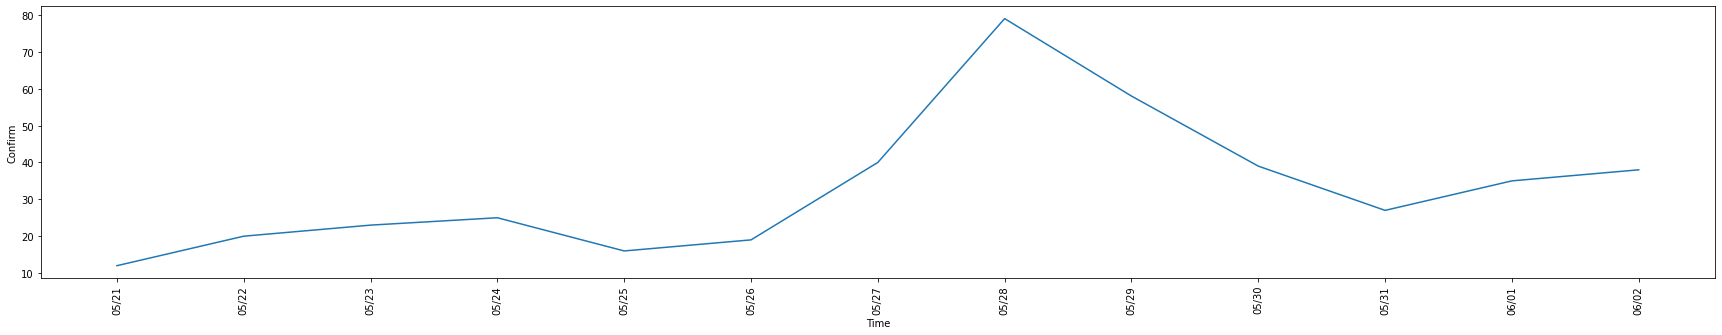

In [153]:
#일일 코로나 확진자 추이
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(close_karaoke['date'], close_karaoke['daily'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

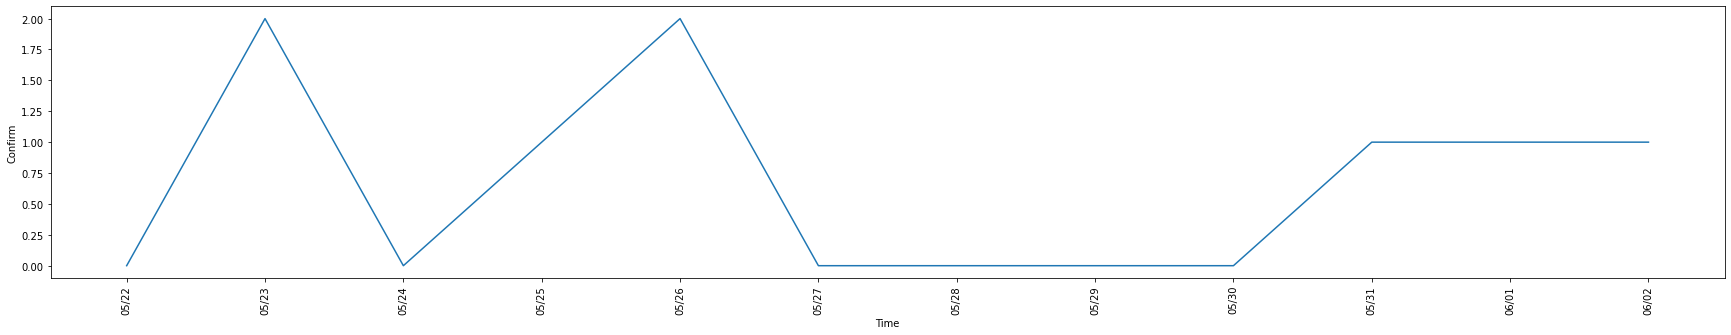

In [154]:
#일일 코로나 사망자 추이
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(close_karaoke['date'], close_karaoke['death'].diff())
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

### 이후

In [156]:
after = total_confirmed.iloc[127:]

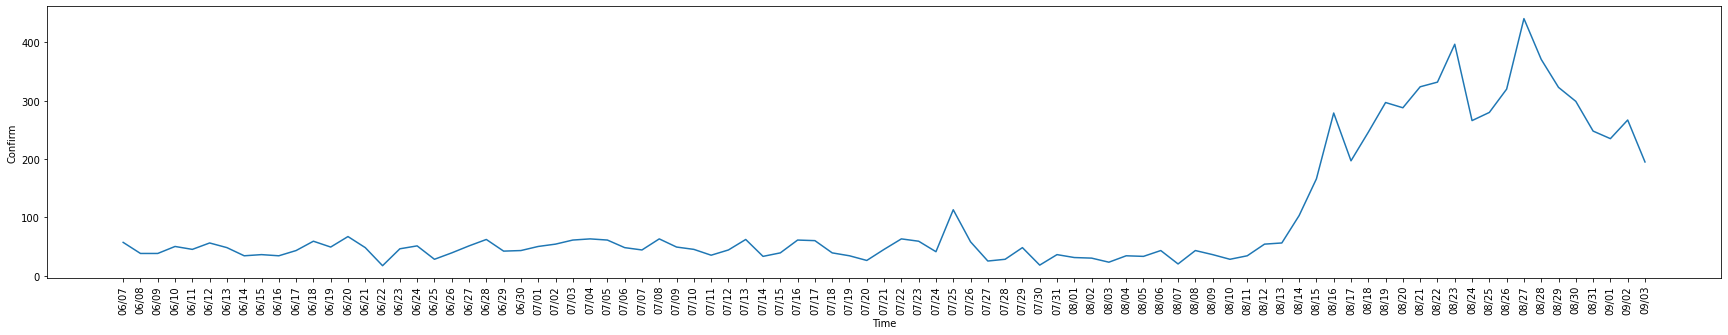

In [157]:
#일일 코로나 확진자 추이
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(after['date'], after['daily'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

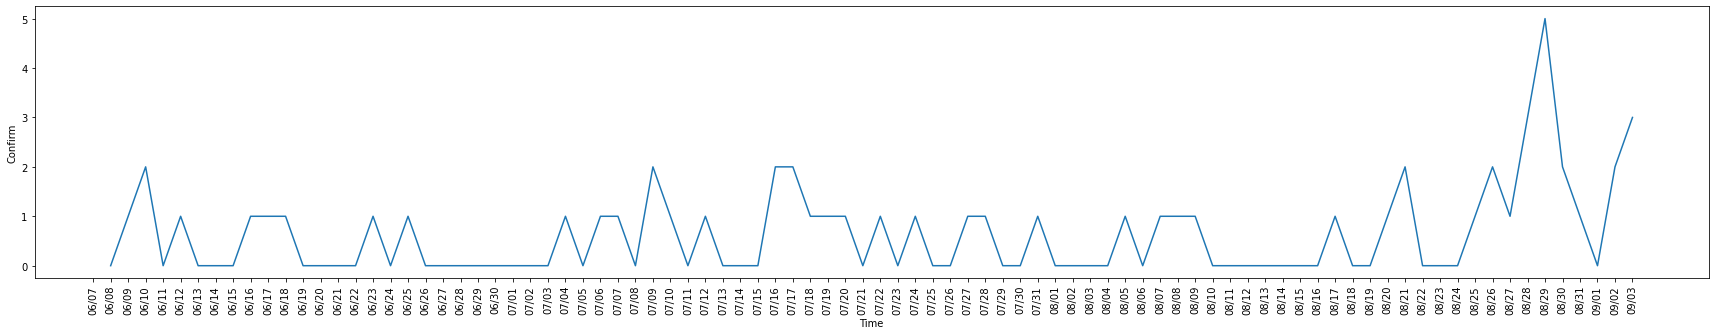

In [158]:
#일일 코로나 사망자 추이
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(after['date'], after['death'].diff())
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

# 마스크 분배에 따른 코로나 확진자 추이

1. 마스크 관련 정책 이전

In [162]:
before_mask = total_confirmed.iloc[:28]

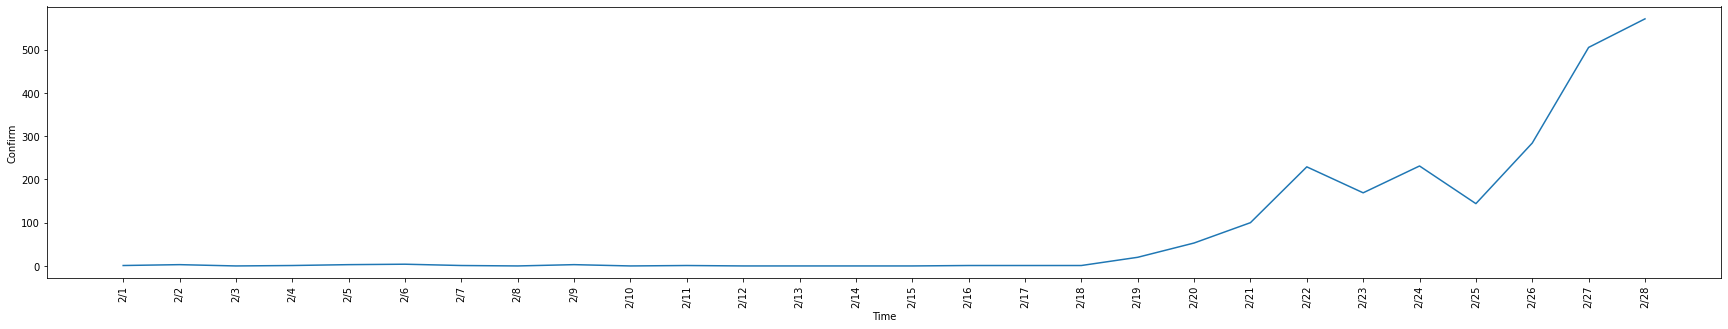

In [163]:
#일일 코로나 확진자 추이
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_mask['date'], before_mask['daily'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

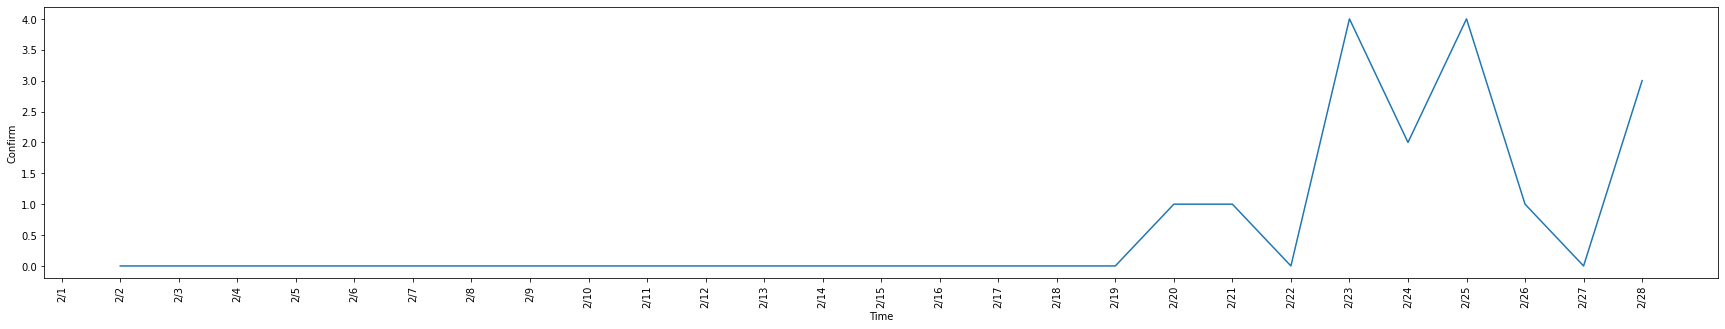

In [164]:
#일일 코로나 사망자 추이
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(before_mask['date'], before_mask['death'].diff())
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

2. 마스크 가격 인하

In [168]:
sale_mask = total_confirmed.iloc[26:35]

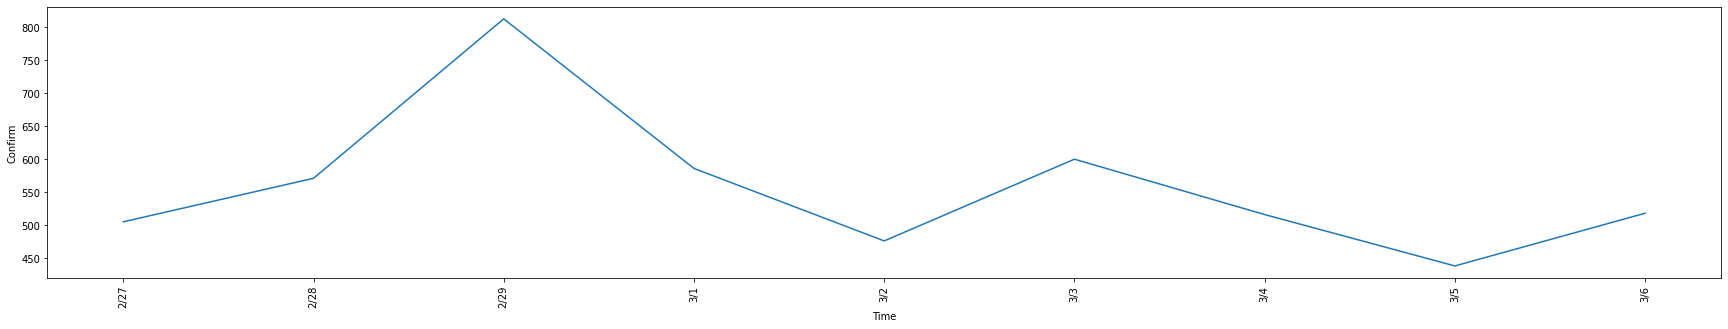

In [169]:
#일일 코로나 확진자 추이
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(sale_mask['date'], sale_mask['daily'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

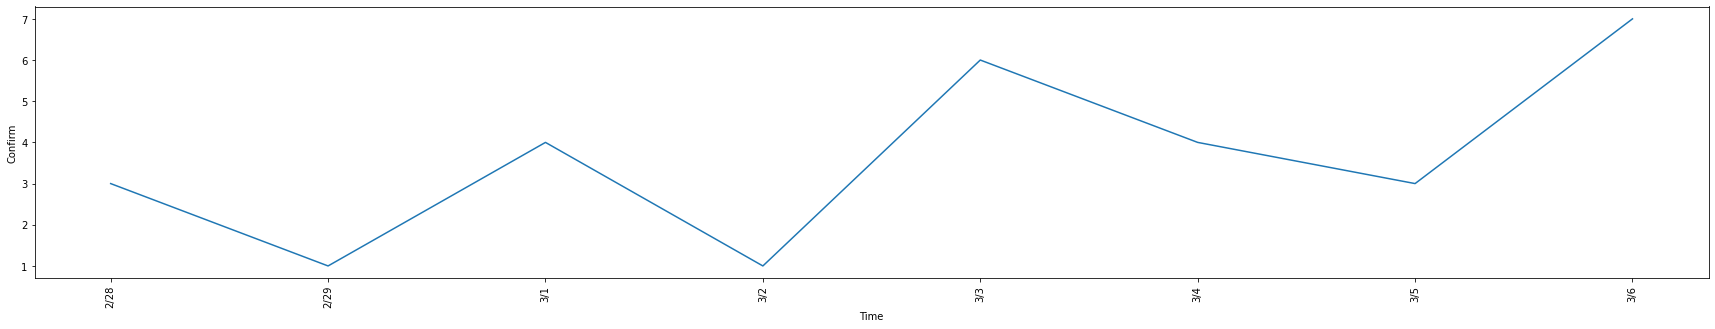

In [171]:
#일일 코로나 사망자 추이
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(sale_mask['date'], sale_mask['death'].diff())
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

3. 마스크 5부제 실시

In [175]:
sale_mask = total_confirmed.iloc[37:122]

,Unnamed: 0,date,accumulate,daily,death,released
37,37,3/9,7382,284,51,166
38,38,3/10,7513,131,54,247
39,39,3/11,7755,242,60,288
40,40,3/12,7869,114,66,333
41,41,3/13,7979,110,67,410
...,...,...,...,...,...,...
117,117,05/28,11344,79,269,10340
118,118,05/29,11402,58,269,10363
119,119,05/30,11441,39,269,10398
120,120,05/31,11468,27,270,10405


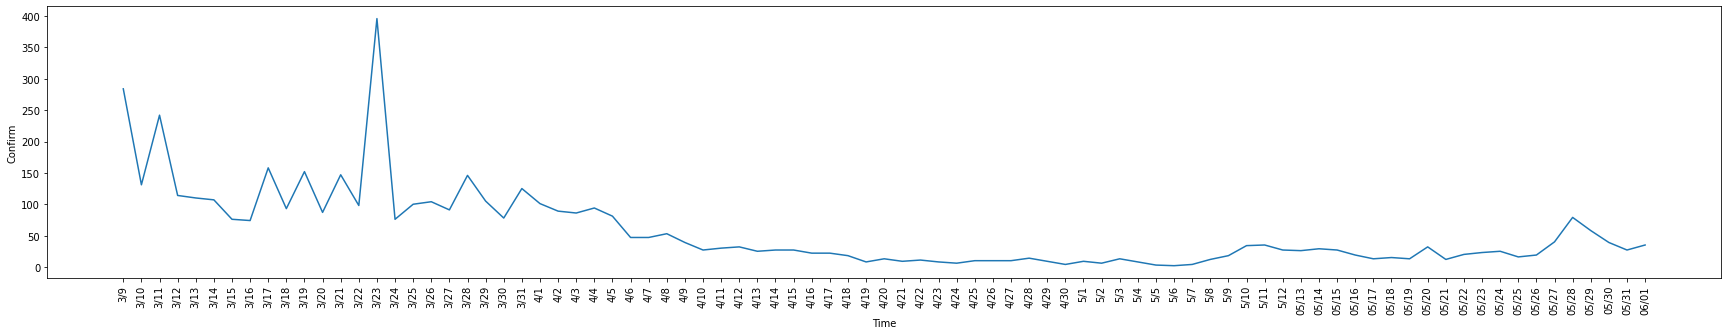

In [176]:
#일일 코로나 확진자 추이
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(sale_mask['date'], sale_mask['daily'])
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()

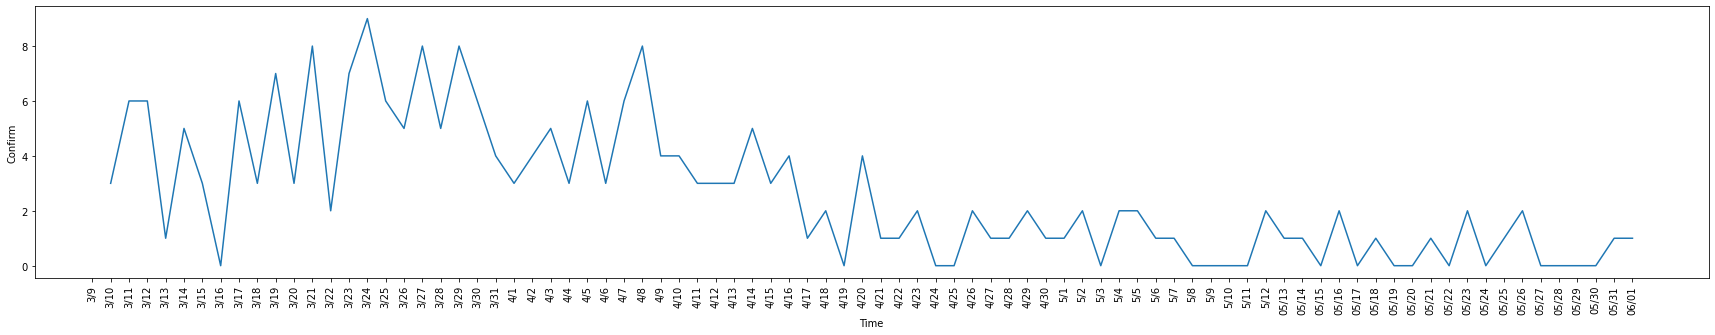

In [177]:
#일일 코로나 사망자 추이
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(sale_mask['date'], sale_mask['death'].diff())
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Confirm')
plt.show()